<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/sampling/compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression
## David Brady
## University of Arizona
## Spring 2023

Conventional image compression relies on transform coding and run length coding. Transform coding includes both color space transformations and spatial basis transformations, such as Fourier or wavelet transforms.

Neural compression strategies use nonlinear projections to project images onto feature maps or to store images in interpolation functions.

This notebook presents simple examples of these compression strategies.

### libraries

In [1]:
import cv2
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import idct
from google.colab import files

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})

## Color space transformation of a high contrast image

Compression strategies for color images typically begin by subsampling chrominance channels. Here we convert an RGB image into YUV, where Y is luminance and U and V are chromiance. YUV444 includes an independent Y, U, V value for each pixel. YUV422 samples U and V in alternate rows, meaning that 2 signal values are returned for each pixel. YUV420 samples U and V alternately in every other row and every other column, so there  are 4 Y samples for every U and for every V, or 1.5 signal values over all ranges per pixel.

Here we consider the the YUV420 transformation for an unnaturally sharp and smooth signal

---



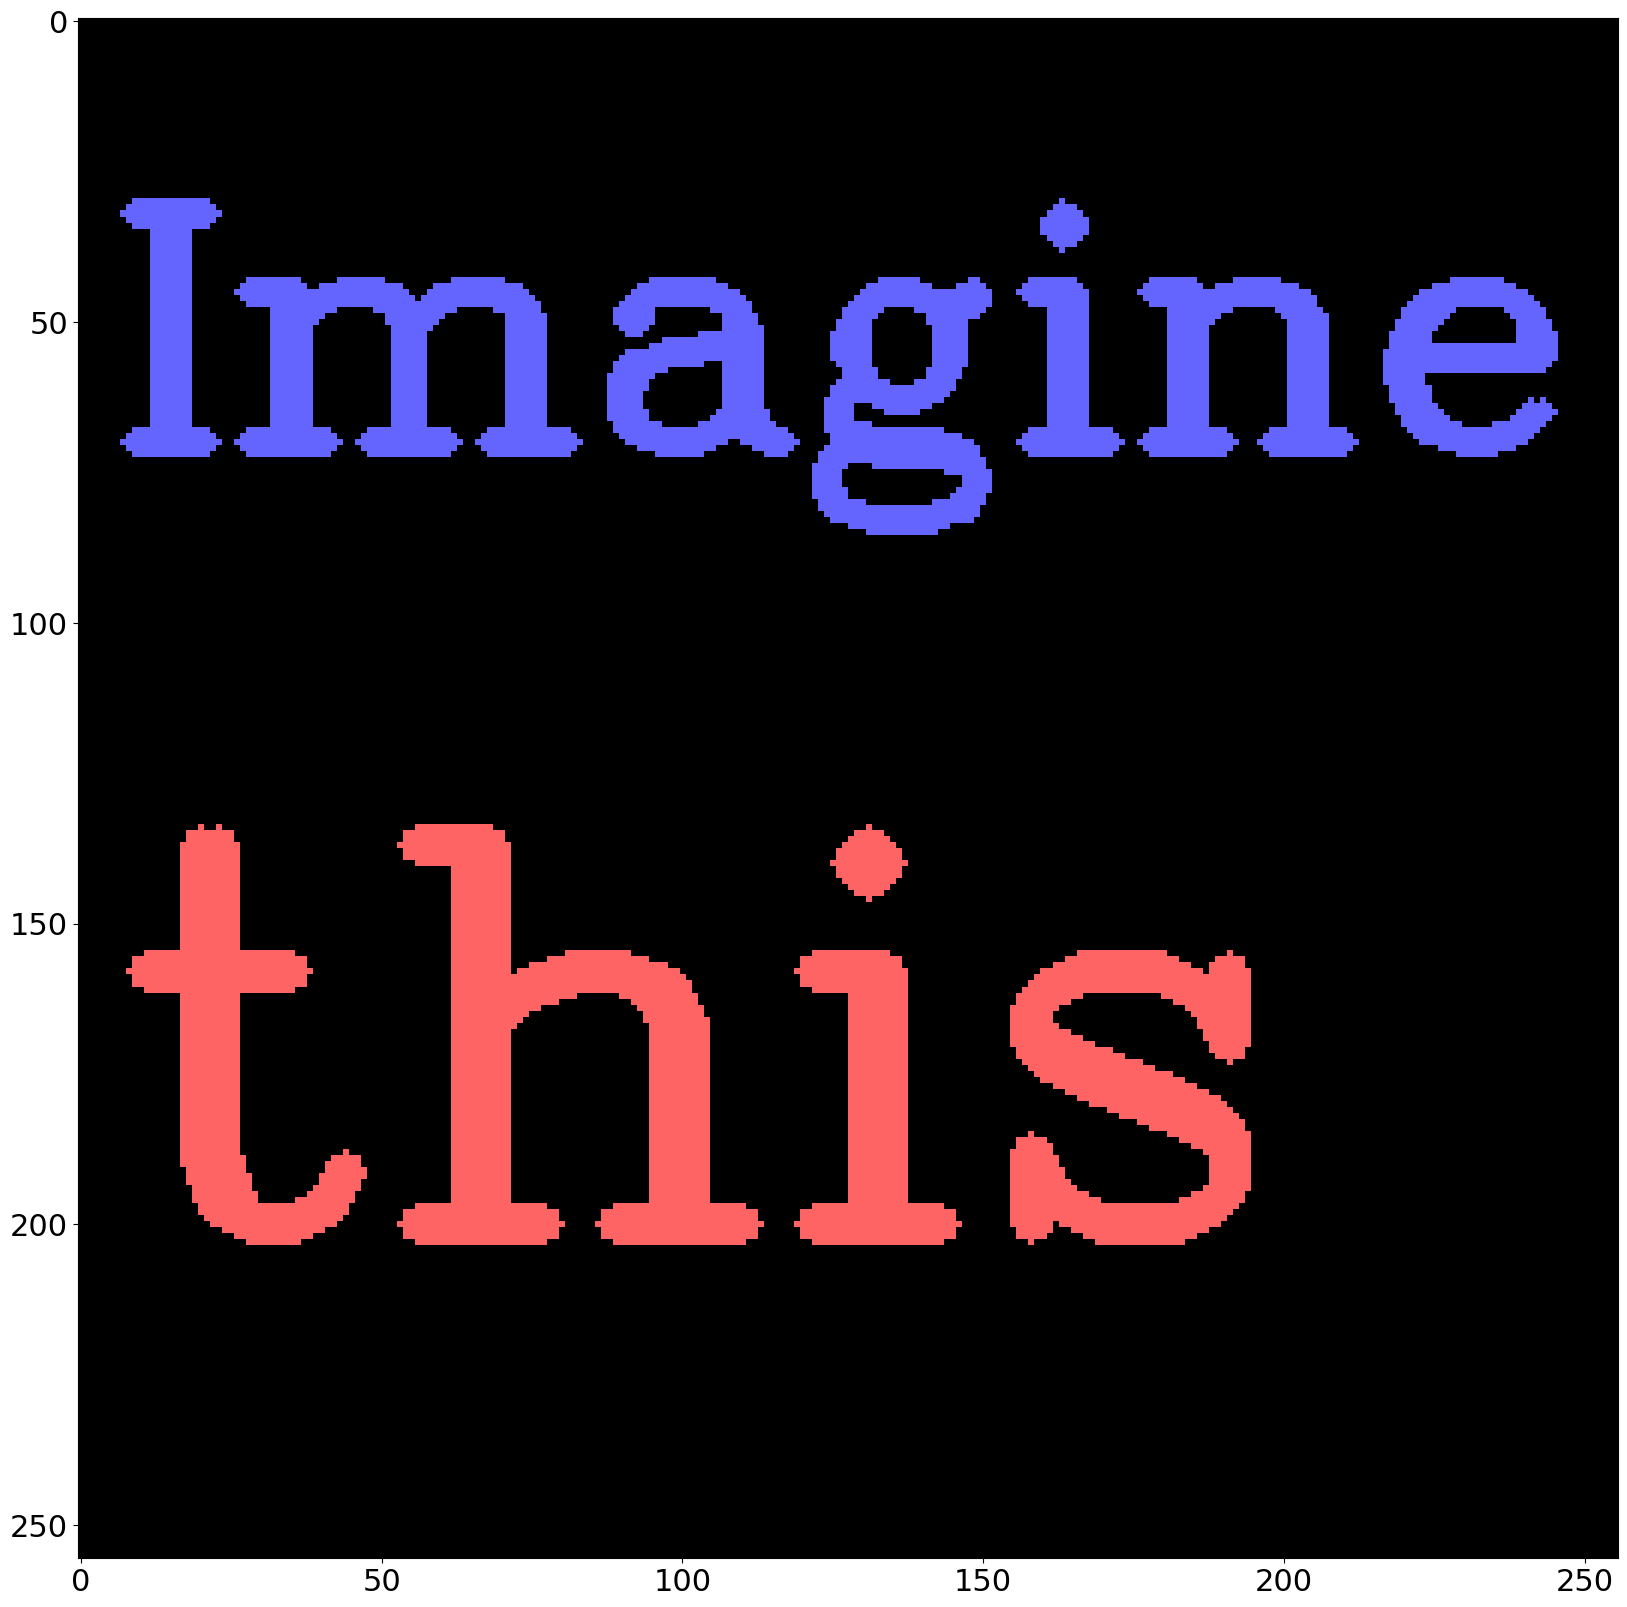

In [3]:
textImg = np.zeros((256,256,3),dtype='uint8')
textImg =cv2.putText(img=np.copy(textImg), text="Imagine", org=(5,70),fontFace=3, fontScale=1.8, color=(100,100,255), thickness=3)
textImg =cv2.putText(img=np.copy(textImg), text="this", org=(5,200),fontFace=3, fontScale=3, color=(255,100,100), thickness=5)
plt.imshow(textImg)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

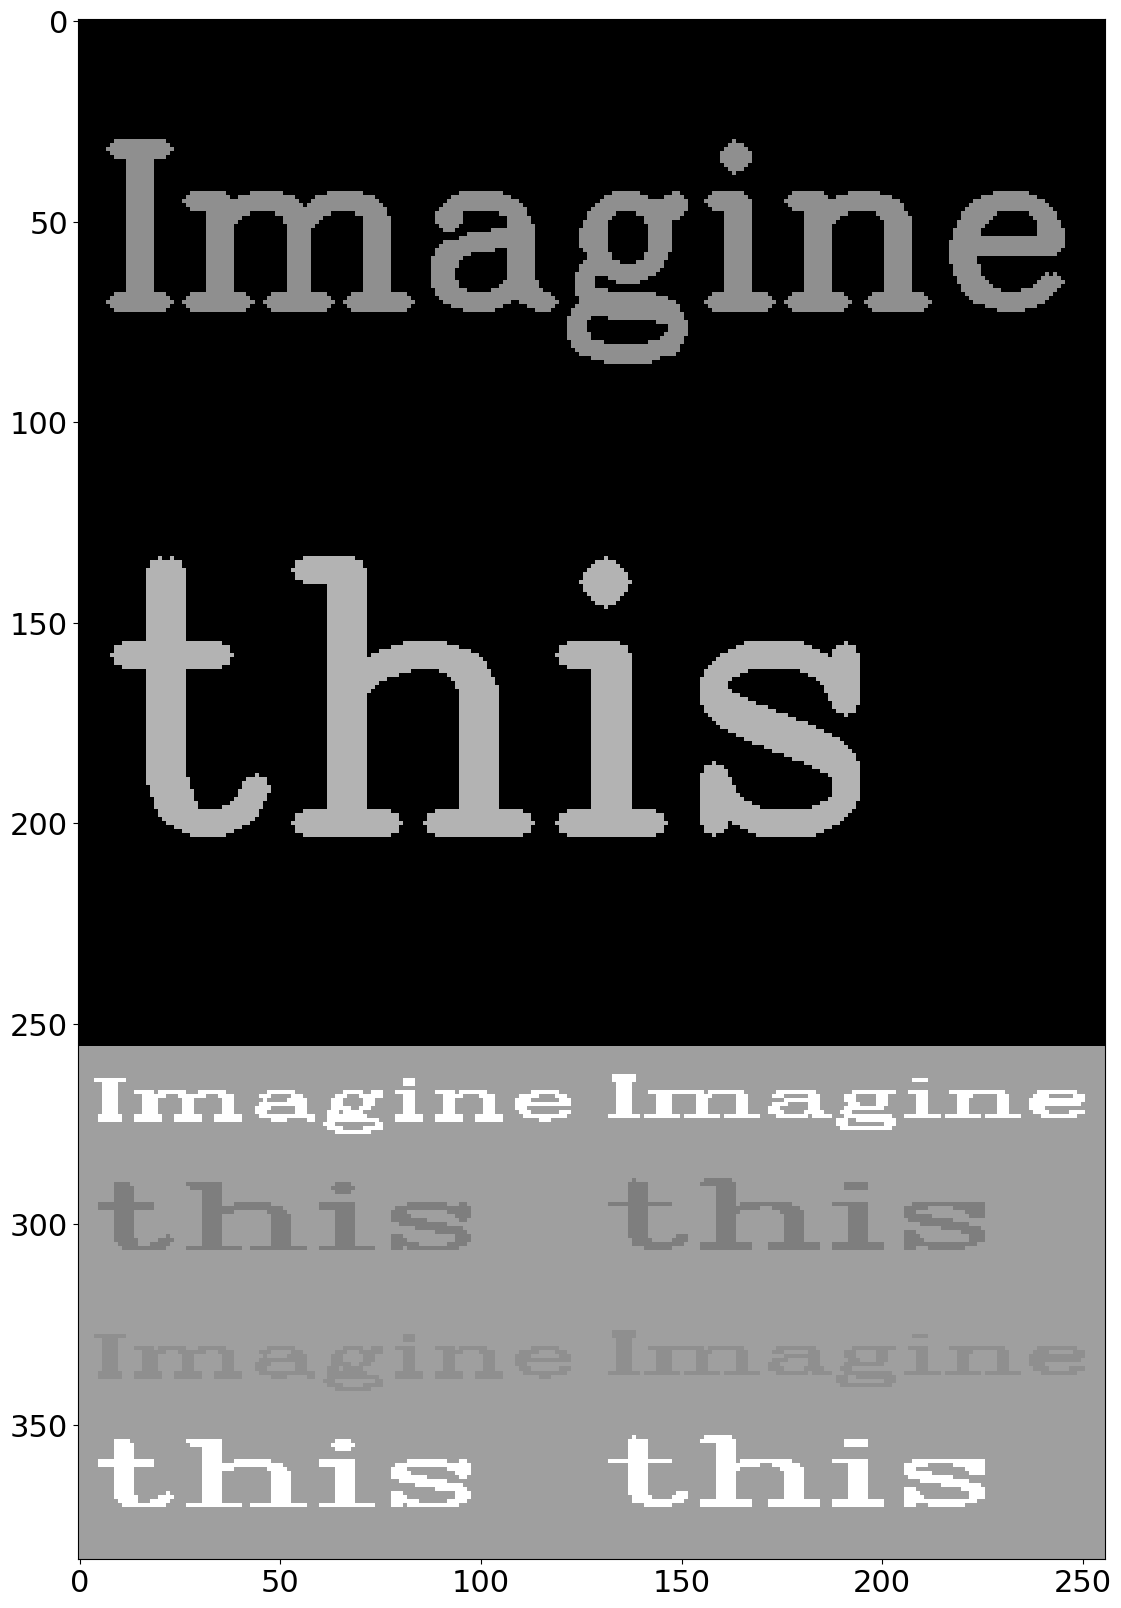

In [6]:
img_yuv420 = cv2.cvtColor(textImg, cv2.COLOR_RGB2YUV_I420)
plt.imshow(img_yuv420,cmap='gray')
plt.savefig('imagineYUV420.pdf',bbox_inches='tight')
files.download('imagineYUV420.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

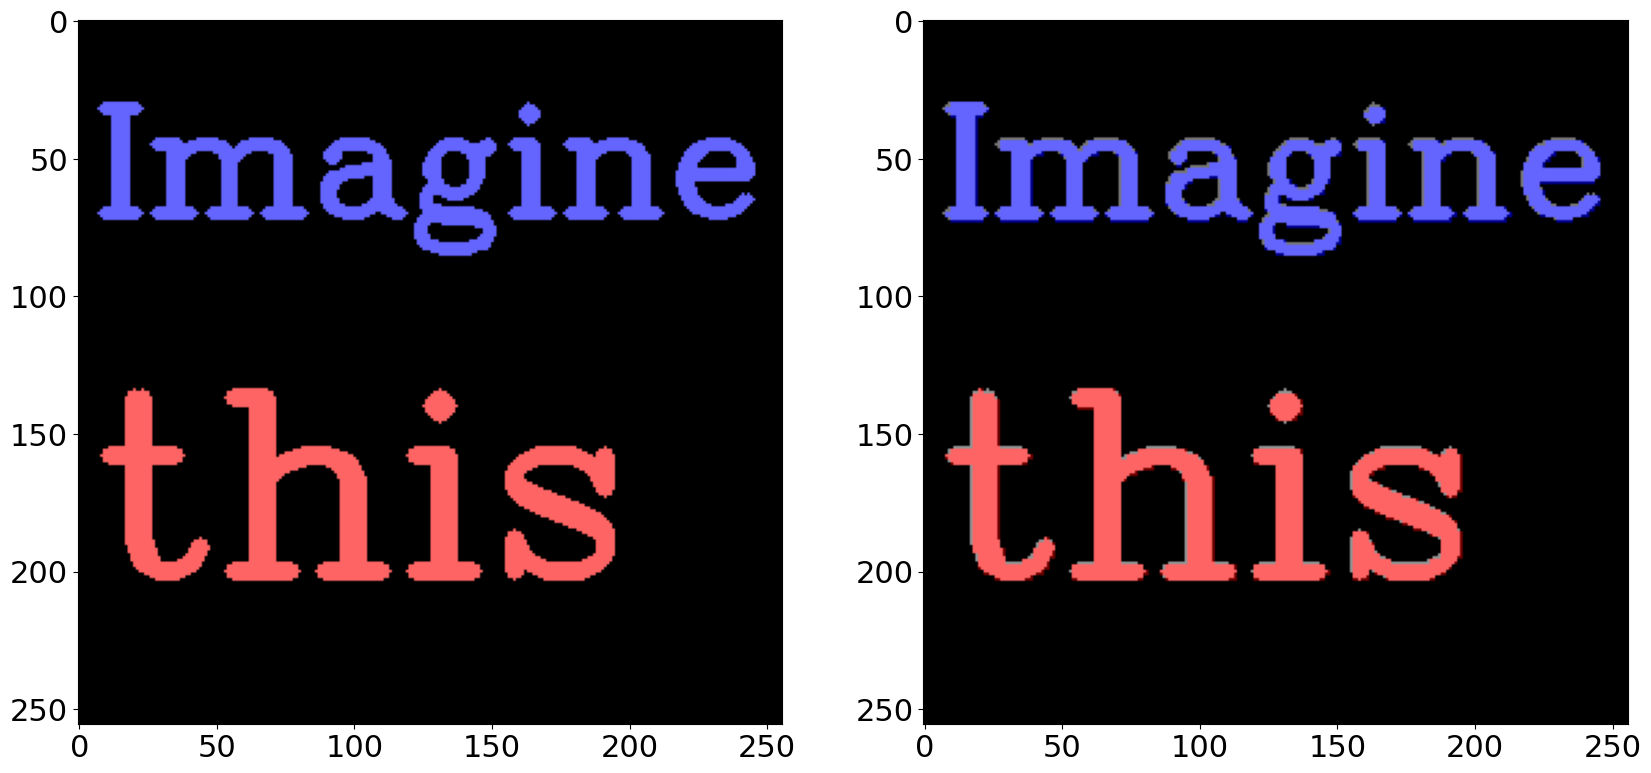

In [7]:
img_RGB = cv2.cvtColor(img_yuv420, cv2.COLOR_YUV2RGB_I420)
plt.subplot(1,2,1)
plt.imshow(textImg)
plt.subplot(1,2,2)
plt.imshow(img_RGB)
plt.savefig('imagineColor.pdf',bbox_inches='tight')
files.download('imagineColor.pdf')

## Color space transformation of a natural image

In [ ]:
!wget --no-check-certificate --content-disposition 'https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/fabric.png'
img=cv2.imread('fabric.png')[300:556,300:556,:]

--2023-04-27 20:41:48--  https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/fabric.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/fabric.png [following]
--2023-04-27 20:41:48--  https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/fabric.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128392 (1.1M) [image/png]
Saving to: ‘fabric.png’

fabric.png          100%[===================>]   1.08M  --.-KB/s    in 0.05s   

2023-04-27 20:41:48 

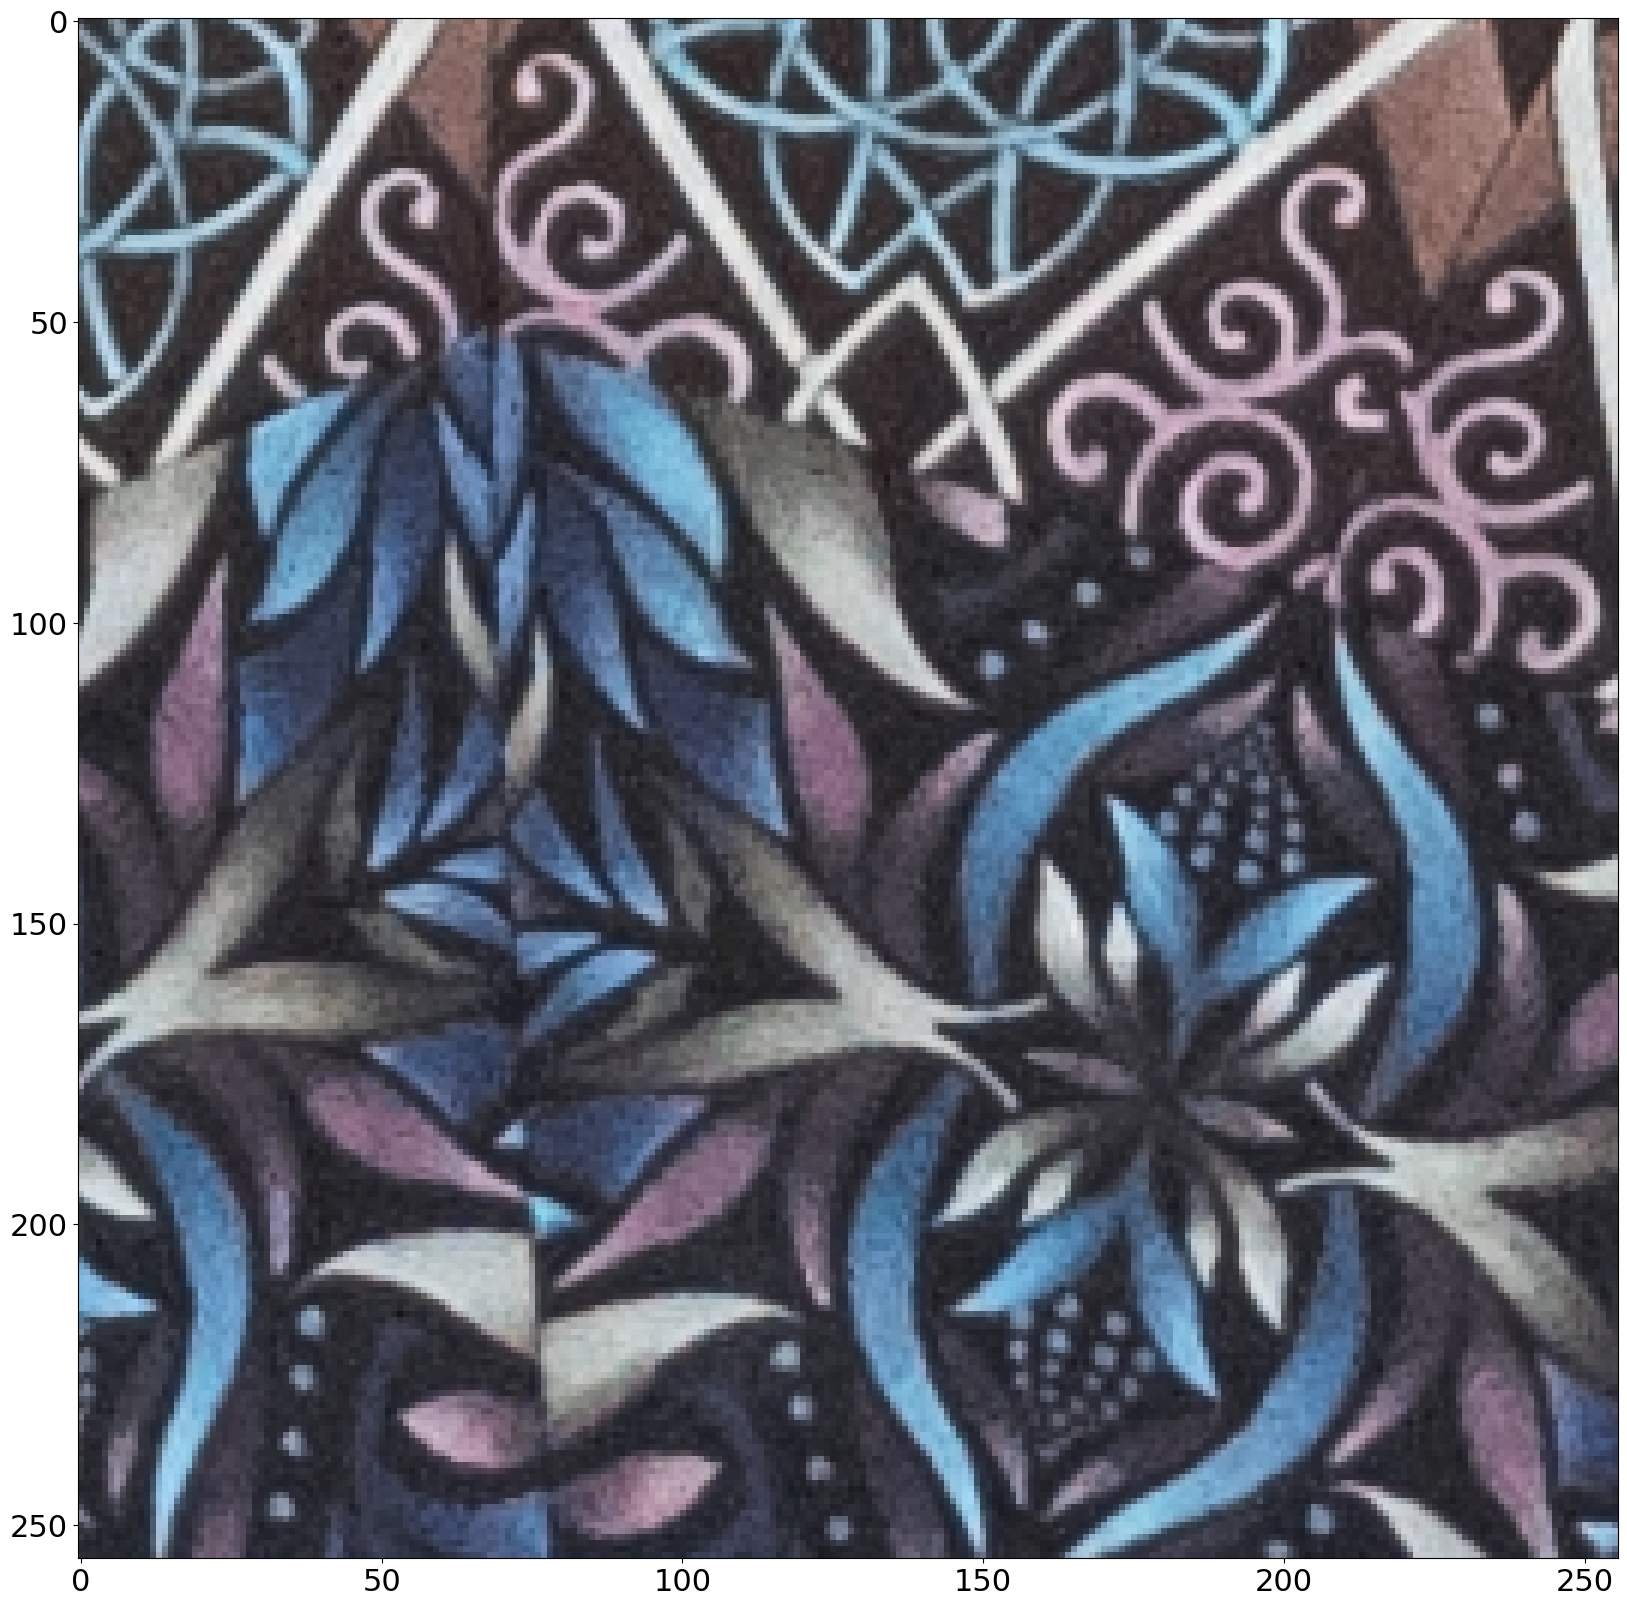

In [ ]:
plt.imshow(img)

In [ ]:
img_yuv420 = cv2.cvtColor(img, cv2.COLOR_RGB2YUV_I420)

In [ ]:
img_yuv420.shape

(384, 256)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

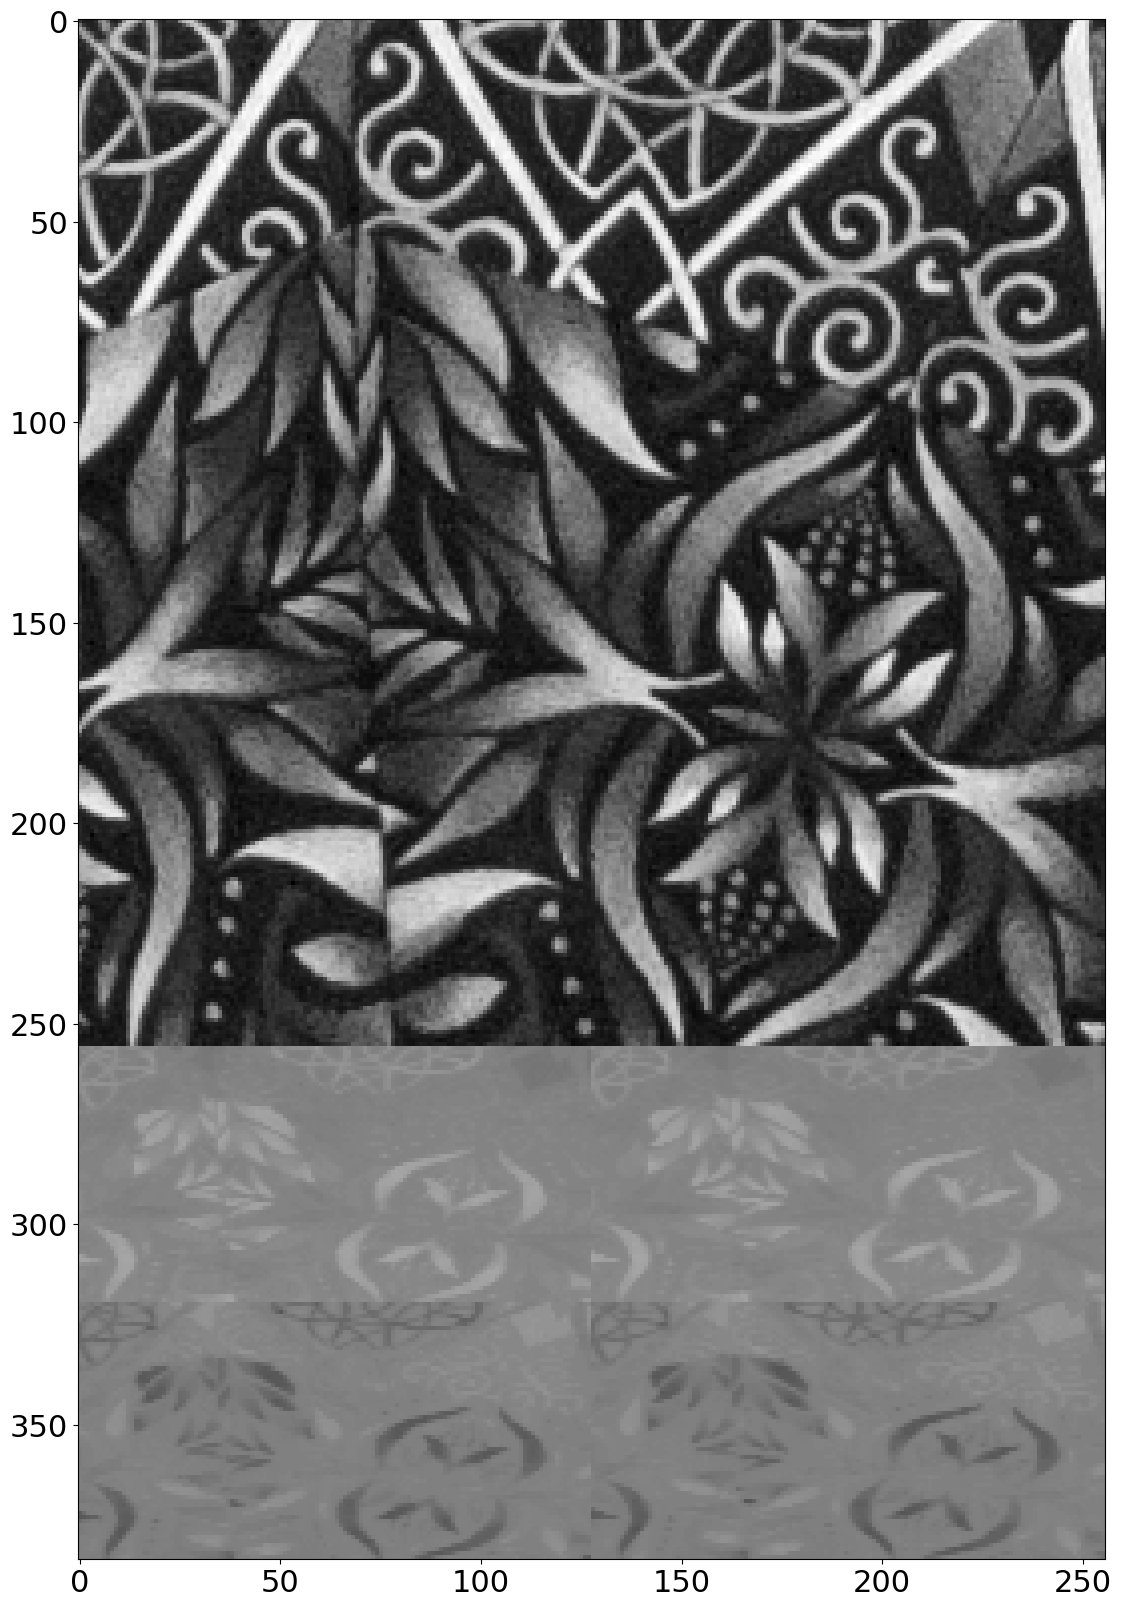

In [ ]:
plt.imshow(img_yuv420,cmap='gray')
plt.savefig('fabricYUV420.pdf',bbox_inches='tight')
files.download('fabricYUV420.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

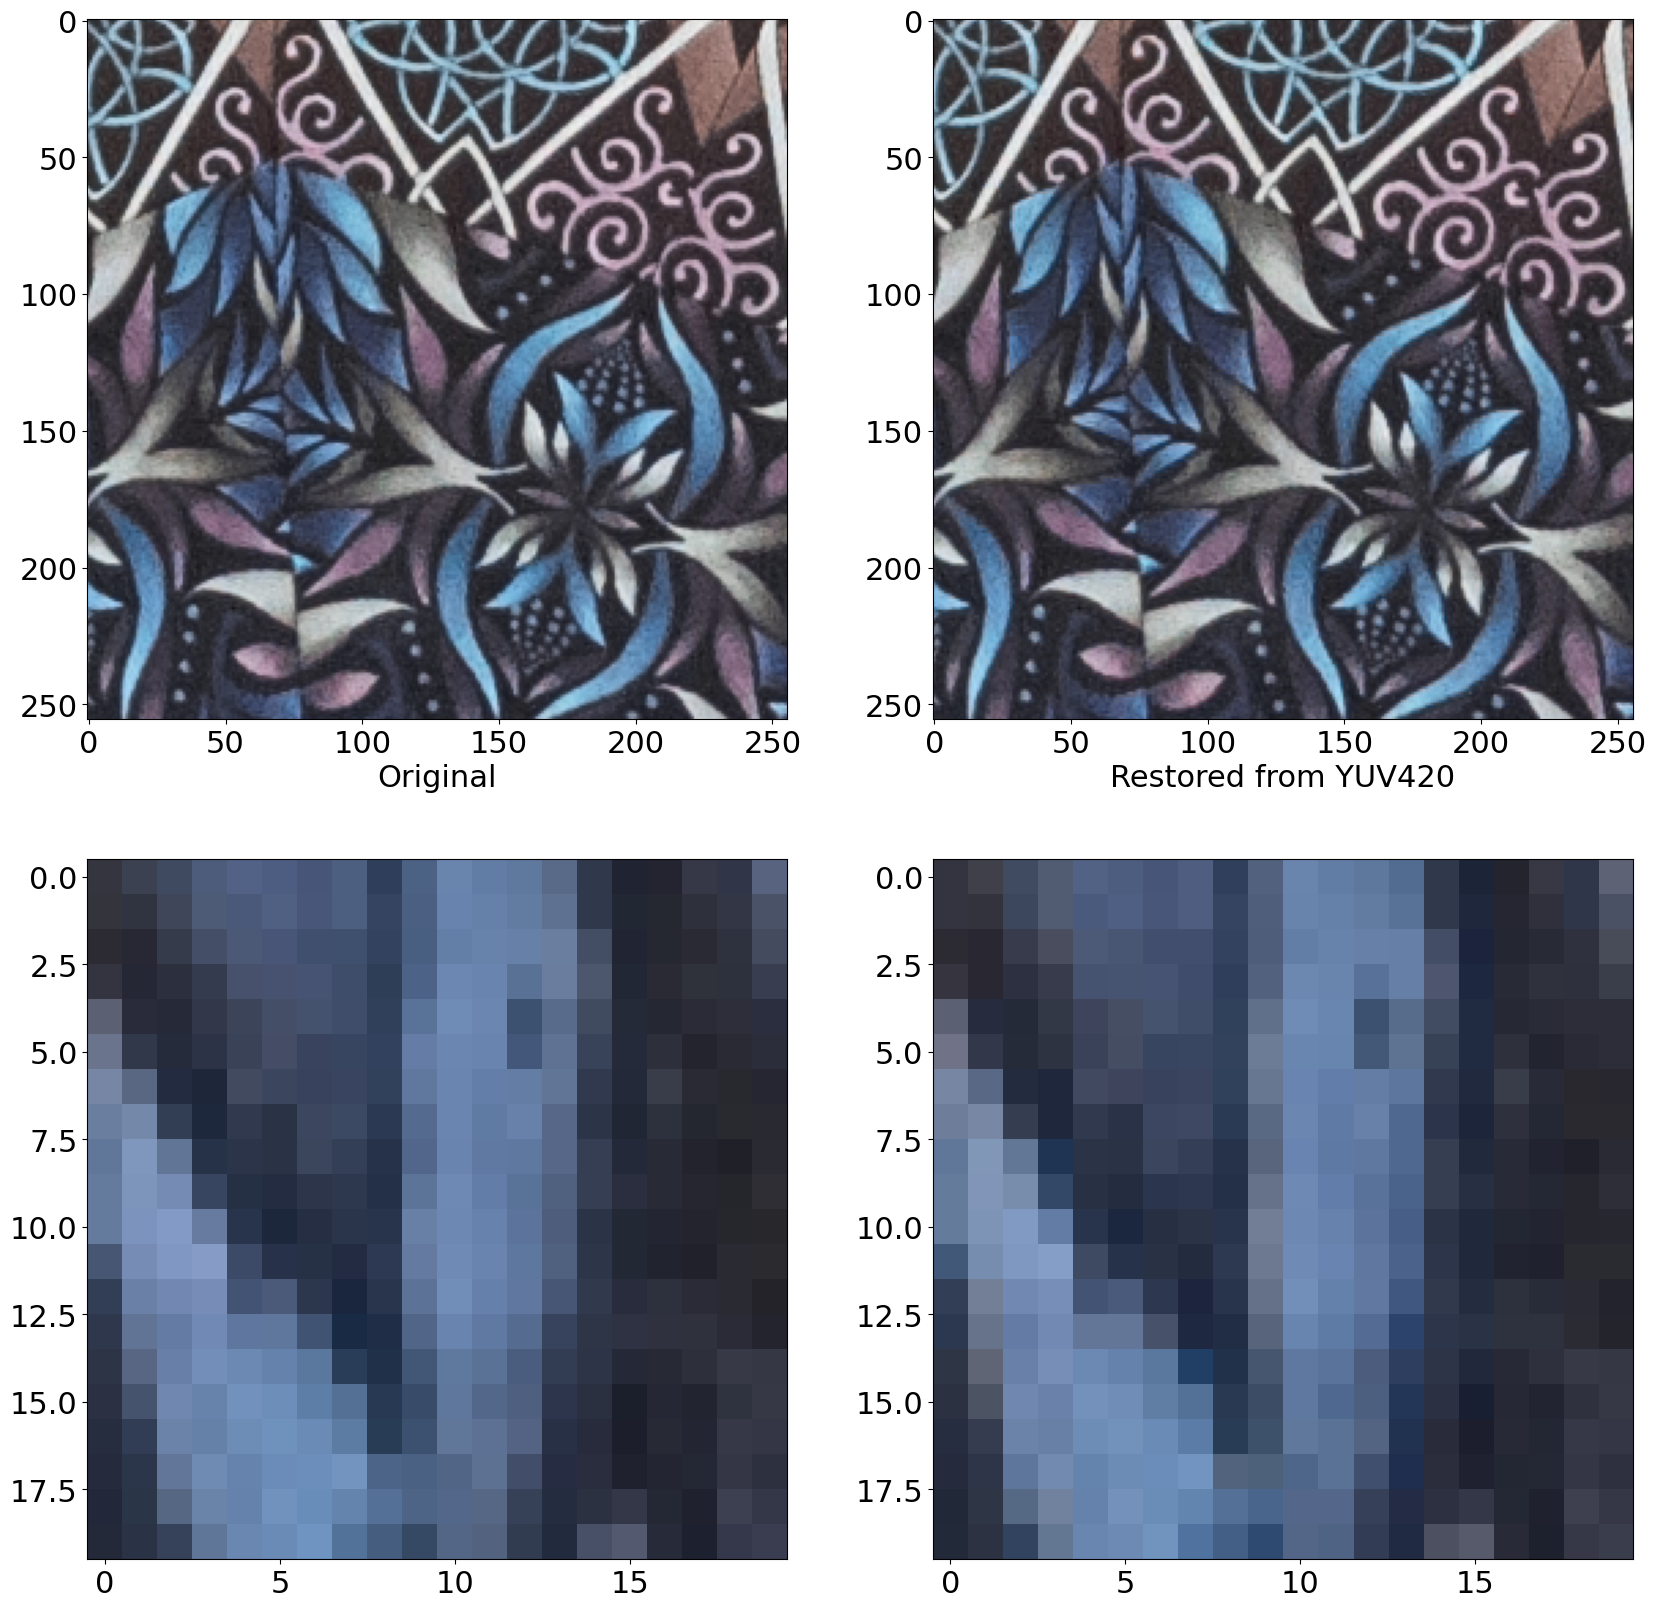

In [ ]:
img_RGB = cv2.cvtColor(img_yuv420, cv2.COLOR_YUV2RGB_I420)
plt.subplot(2,2,1)
plt.imshow(img)
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(img_RGB)
plt.xlabel('Restored from YUV420')
plt.subplot(2,2,3)
plt.imshow(img[60:80,60:80])
plt.subplot(2,2,4)
plt.imshow(img_RGB[60:80,60:80])
plt.savefig('fabricYUV.pdf',bbox_inches='tight')
files.download('fabricYUV.pdf')

In [ ]:
y=img_yuv420[0:256,0:256]

## Discrete Cosine Transform Coding

JPEG Compression uses a quantification matrix, such that each value of the compressed signal is divided by q. Here we take the 2D DCT of an image, quantize with q, take the inverse DCT of the signal modulated by q. Before considering the 2D DCT, we consider simple code implementing the 1D DCT and inverse DCT.

In [ ]:
def dctM(N):
  n,k =np.meshgrid(np.arange(0,N),np.arange(0,N))
  return np.cos(np.pi*k*(2*n+1)/(2*N))/np.sqrt(N)
def idctM(N):
  idct=np.zeros((N,N))
  idct[:,0]=1/np.sqrt(N)
  k,n =np.meshgrid(np.arange(1,N),np.arange(0,N))
  idct[:,1:N]=2*np.cos(np.pi*k*(2*n+1)/(2*N))/np.sqrt(N)
  return idct


In [ ]:
As illustrated here, the inverse dct of the dct is an identity

In [ ]:
N=8
print(np.round(np.matmul(idctM(N),dctM(N)),2))

[[ 1. -0.  0.  0. -0.  0.  0. -0.]
 [-0.  1.  0.  0.  0. -0. -0.  0.]
 [ 0.  0.  1. -0. -0. -0. -0. -0.]
 [ 0.  0. -0.  1.  0.  0.  0.  0.]
 [-0.  0. -0.  0.  1. -0. -0. -0.]
 [ 0. -0. -0.  0. -0.  1.  0.  0.]
 [ 0. -0. -0.  0. -0.  0.  1.  0.]
 [-0.  0. -0.  0. -0.  0.  0.  1.]]


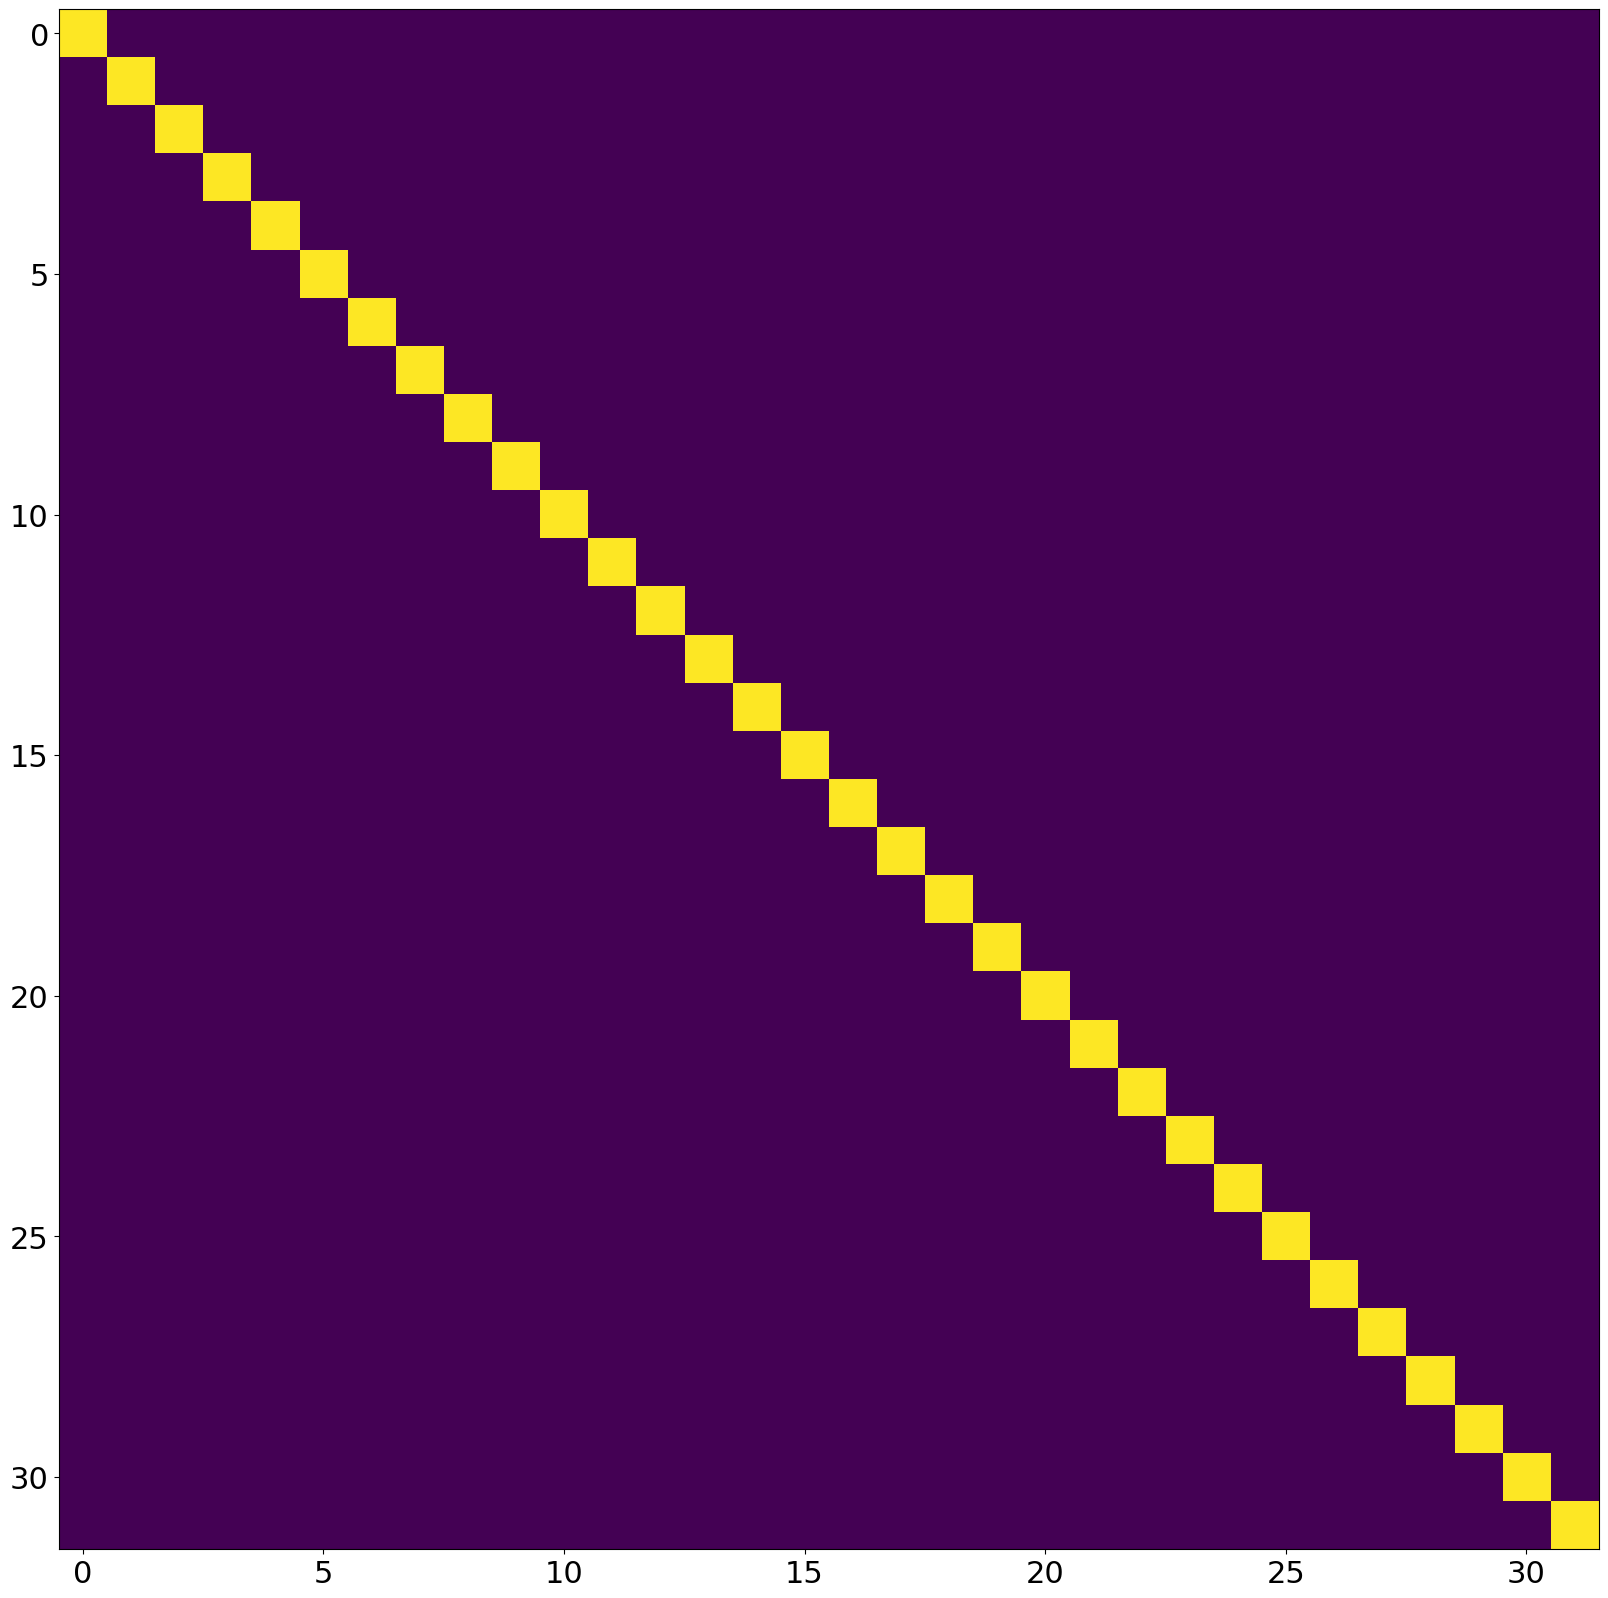

In [ ]:
N=32
plt.imshow(np.matmul(idctM(N),dctM(N)))

### Define 2D DCT

In [ ]:
def dct2(a):
    return dct( dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct( idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')
def dctImage(im):
  imsize = im.shape
  dct = np.zeros(imsize)
  # DCT of Image, assume imsize is divisible by 8
  for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )
  return dct
def idctImage(im):
  imsize = im.shape
  idct = np.zeros(imsize)
  # DCT of Image, assume imsize is divisible by 8
  for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        idct[i:(i+8),j:(j+8)] = idct2( im[i:(i+8),j:(j+8)] )
  return idct
def compressImage(im,q):
  imsize = im.shape
  dct = np.zeros(imsize)
  # DCT of Image, assume imsize is divisible by 8
  for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = np.round(np.divide(dct2( im[i:(i+8),j:(j+8)] ),q))
  return dct
def deCompressImage(im,q):
  imsize = im.shape
  idct = np.zeros(imsize)
  # DCT of Image, assume imsize is divisible by 8
  for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        idct[i:(i+8),j:(j+8)] = idct2( np.multiply(q,im[i:(i+8),j:(j+8)] ))
  return idct





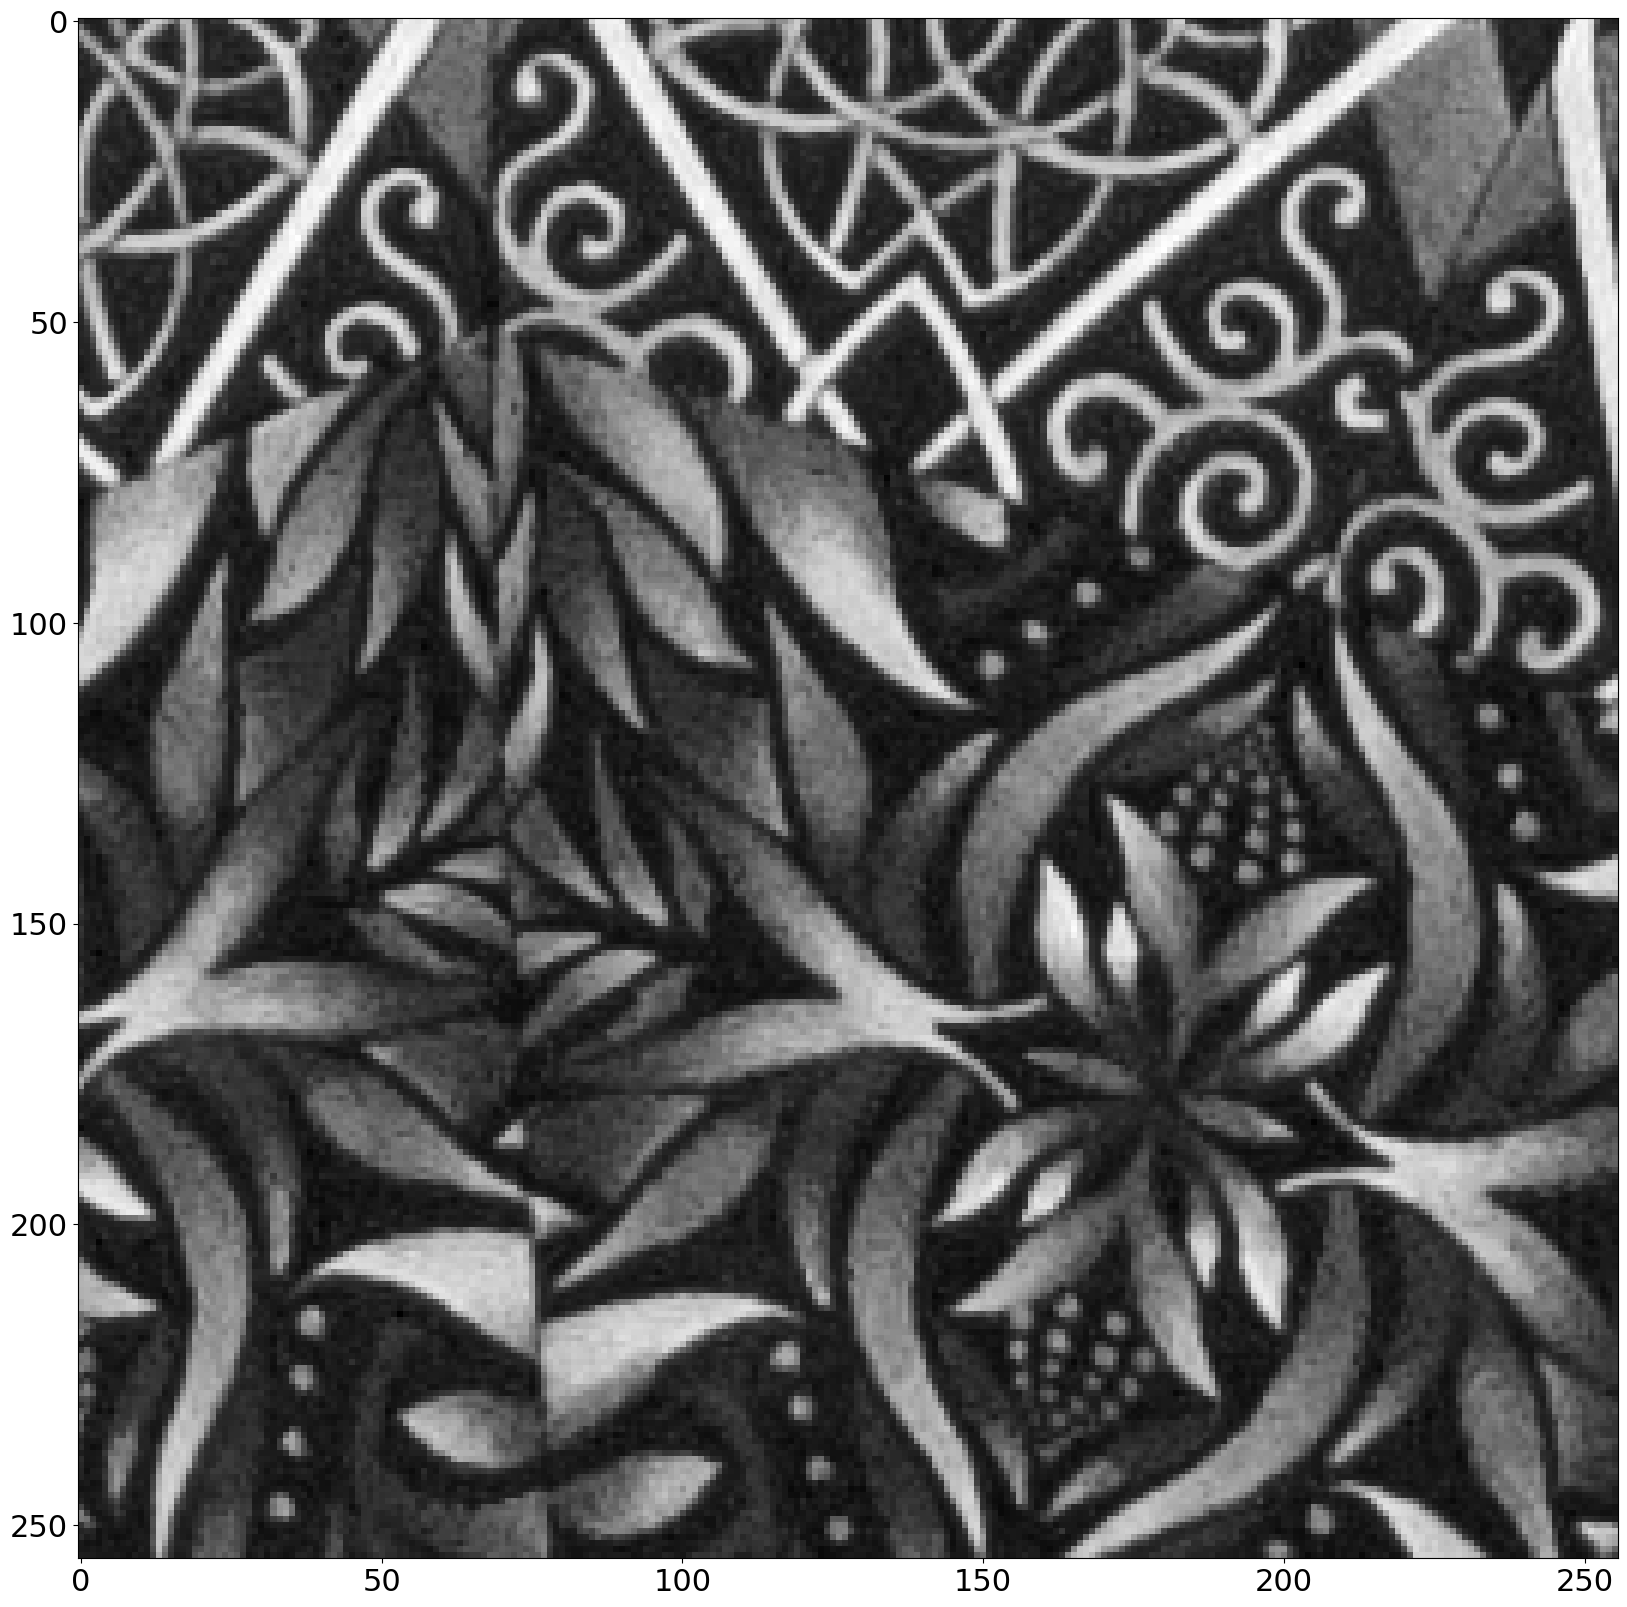

In [ ]:
plt.imshow(y,cmap='gray')

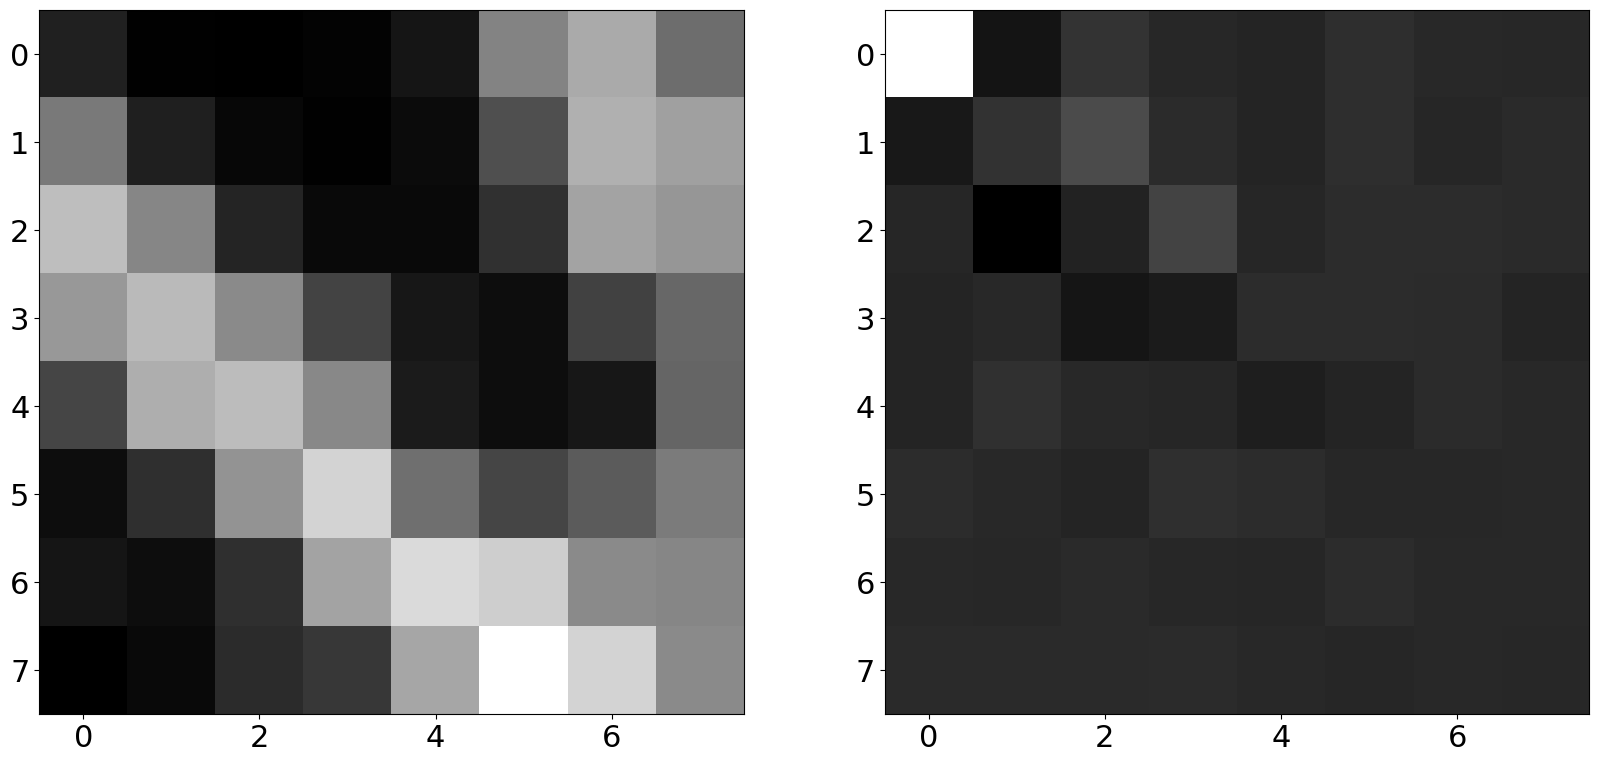

In [ ]:
plt.subplot(1,2,1)
plt.imshow(y[0:8,0:8],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dct2(y[0:8,0:8]),cmap='gray')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

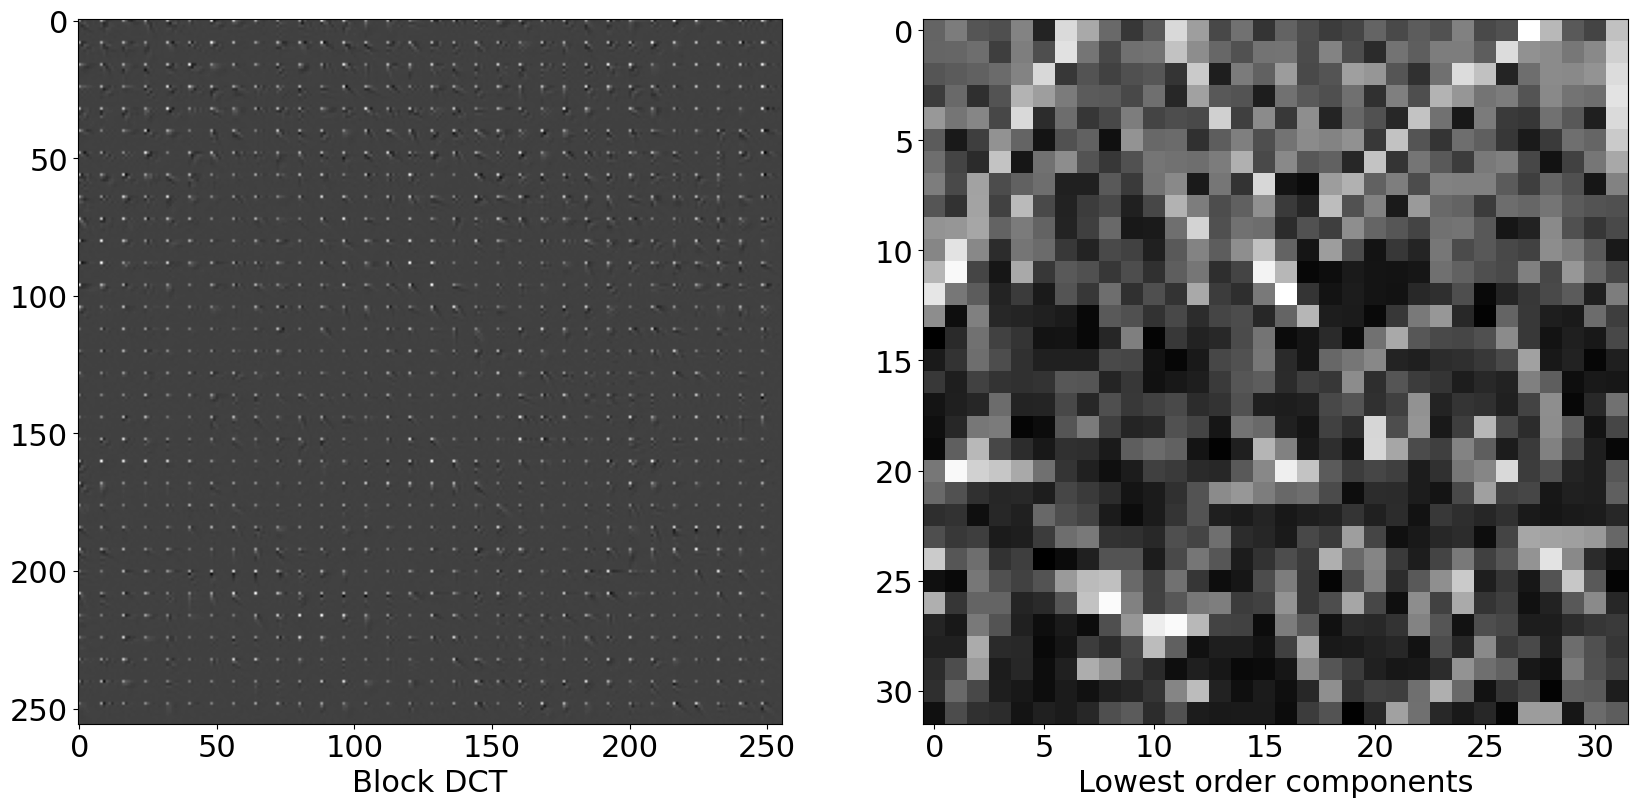

In [ ]:
dy=dctImage(y)
plt.subplot(1,2,1)
plt.imshow(dctImage(y),cmap='gray')
plt.xlabel("Block DCT")
plt.subplot(1,2,2)
plt.imshow(dy[0:256:8,0:256:8],cmap='gray')
plt.xlabel("Lowest order components")
plt.savefig('fabricDCT.pdf',bbox_inches='tight')
files.download('fabricDCT.pdf')

In [ ]:
np.max(dy)

1481.7500000000002

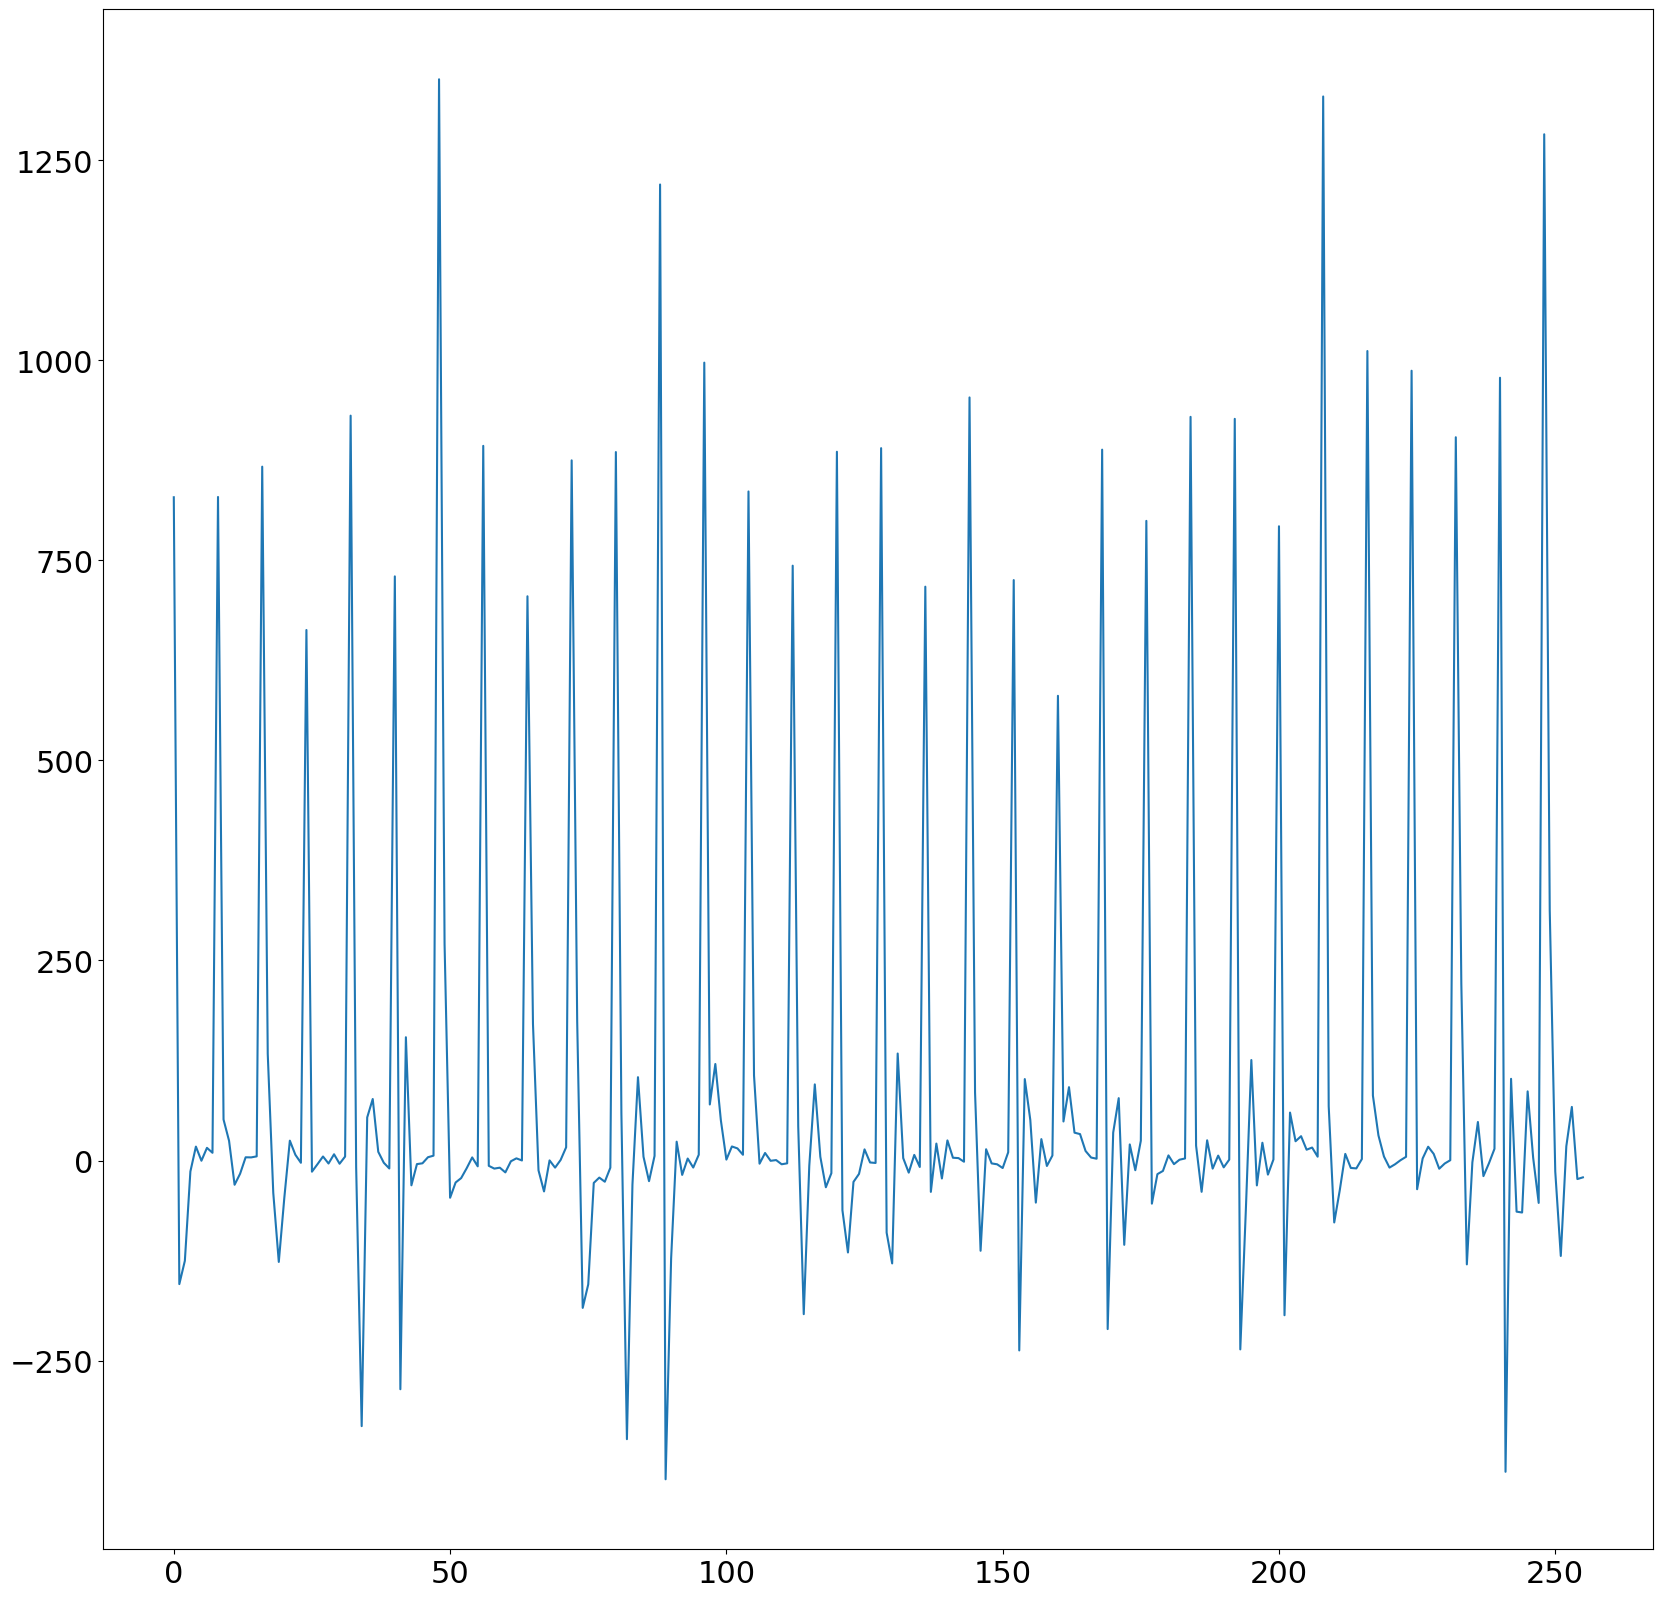

In [ ]:
plt.plot(dy[8,:])

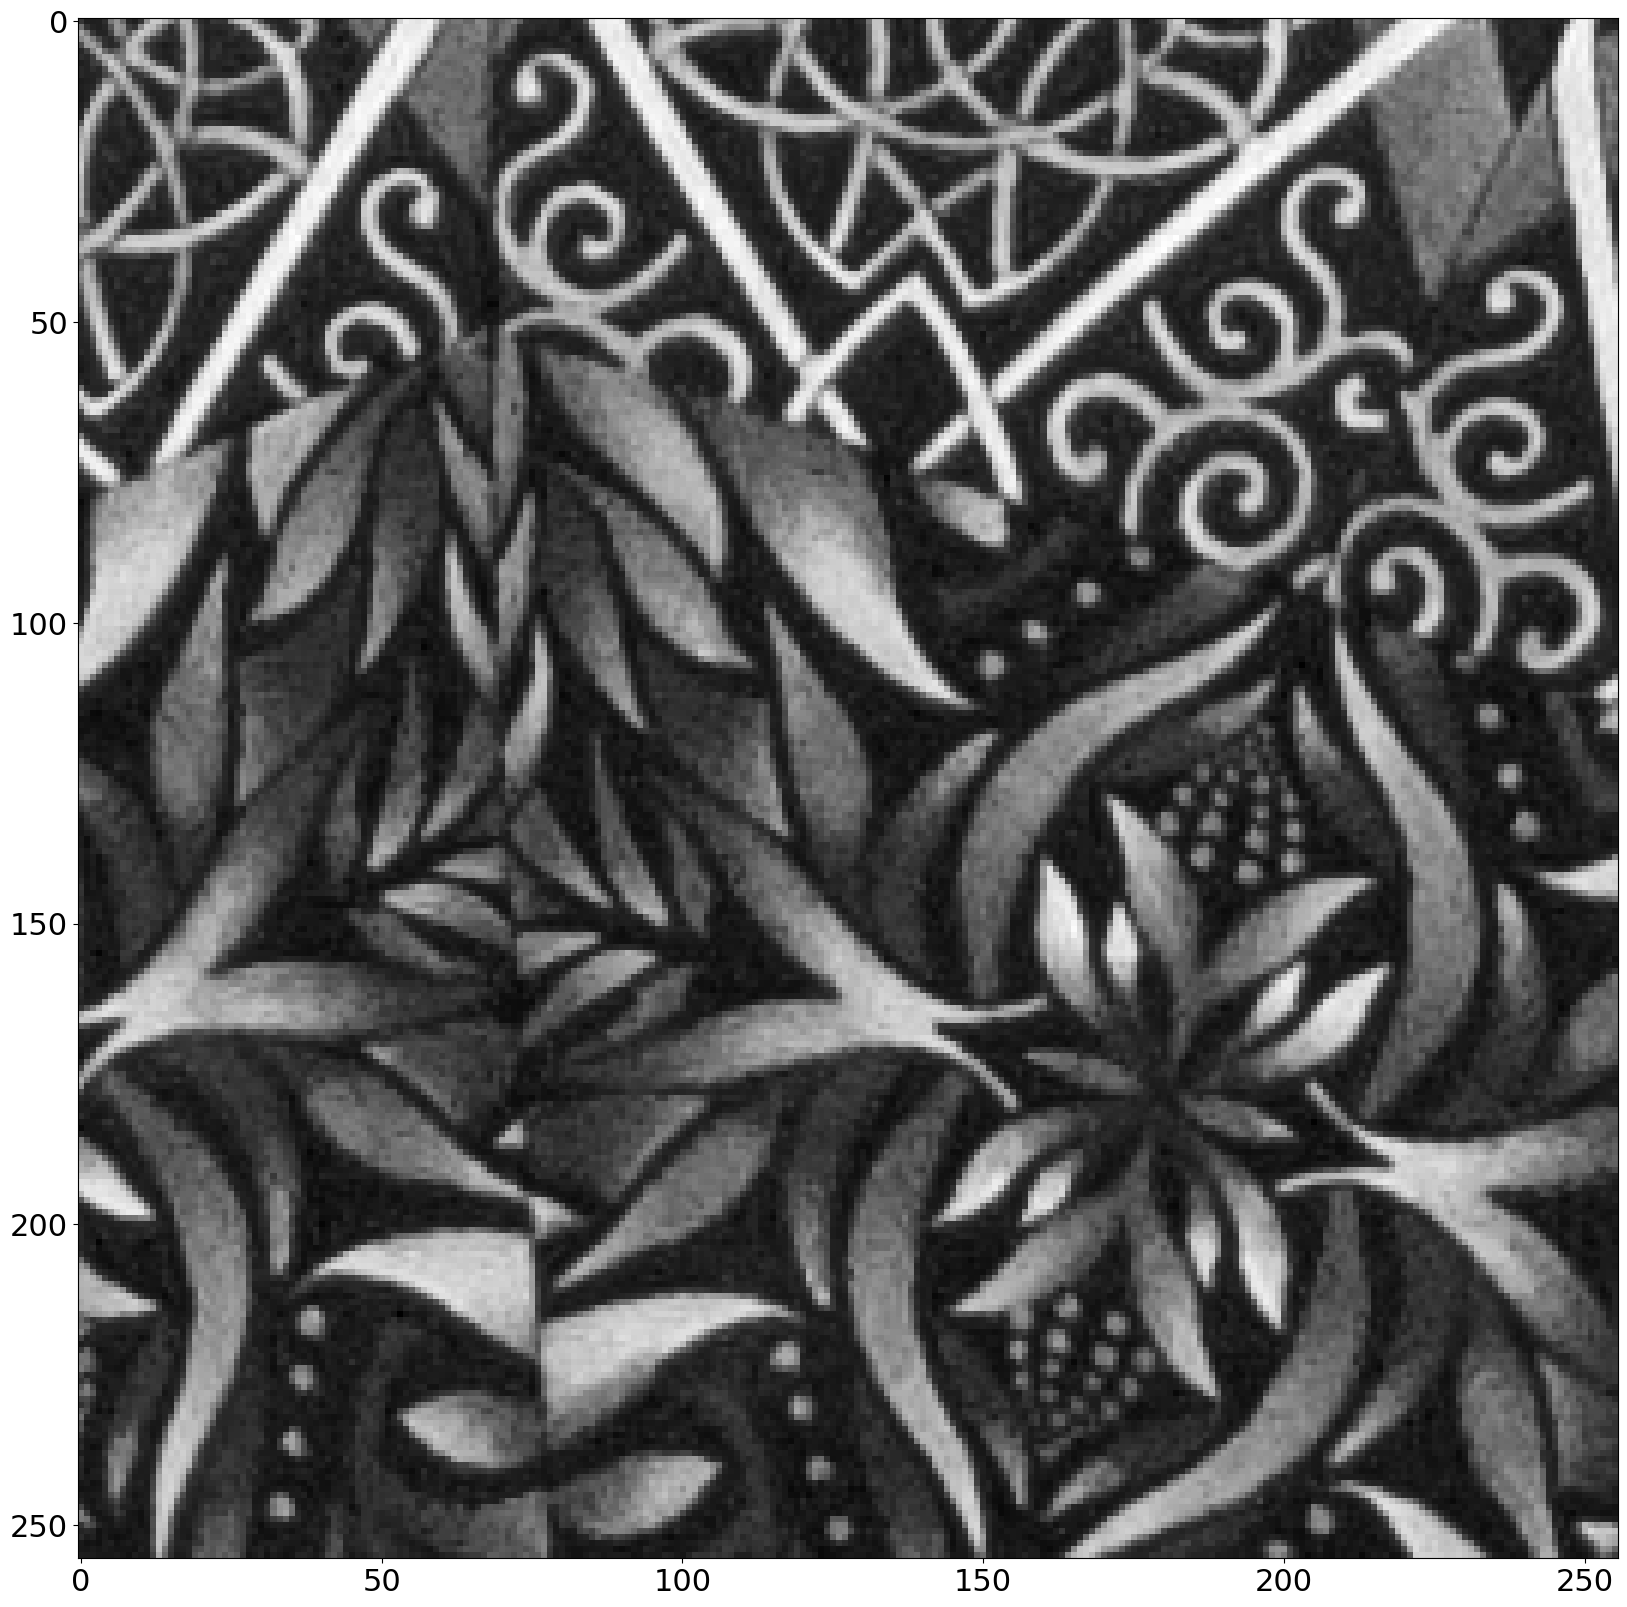

In [ ]:
plt.imshow(idctImage(dy),cmap='gray')

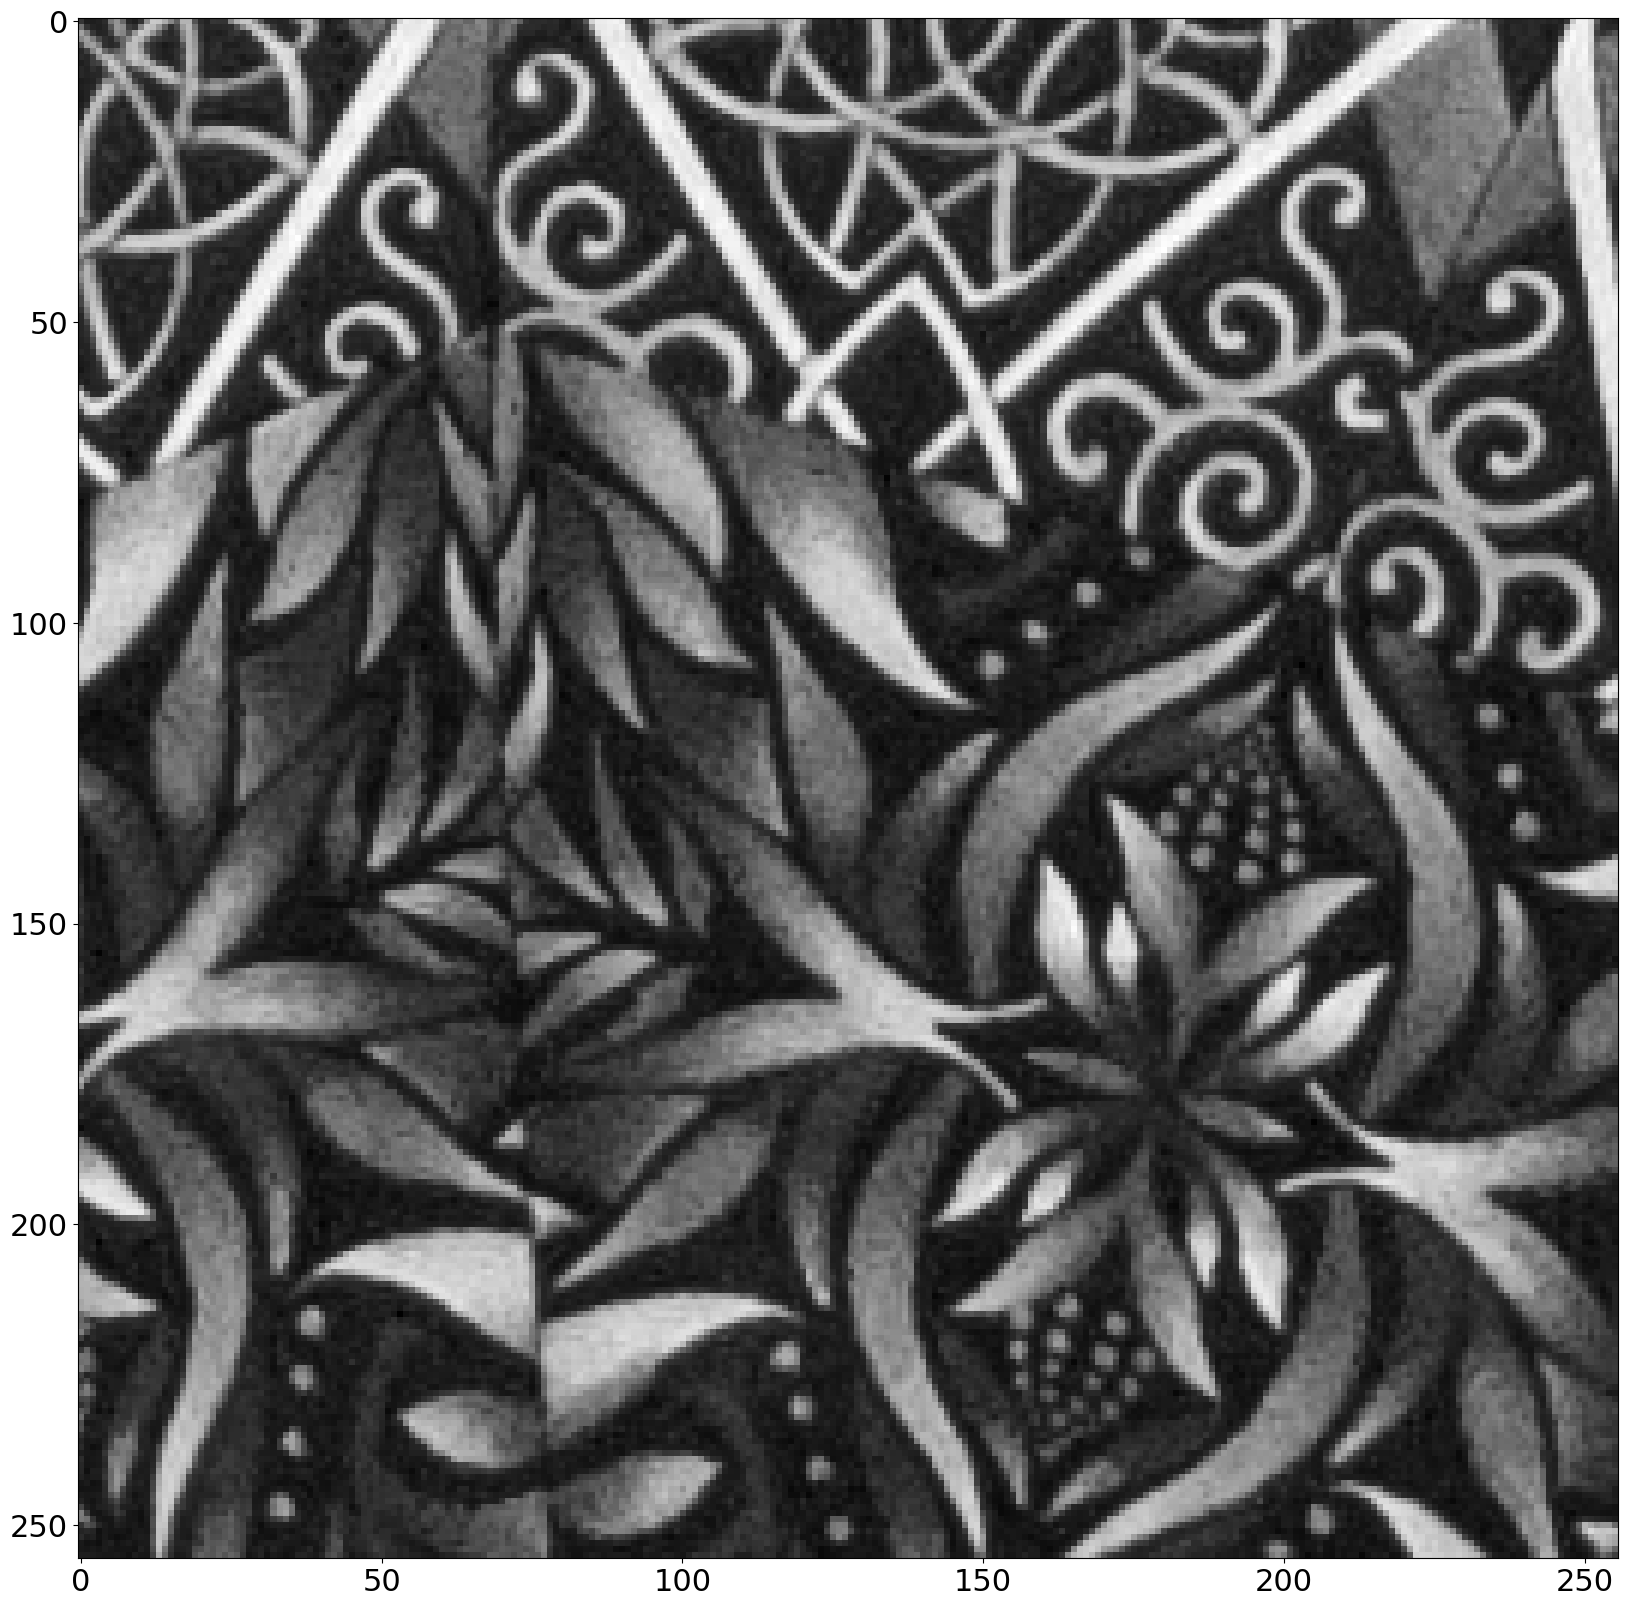

In [ ]:
plt.imshow(idctImage(np.round(dy)),cmap='gray')

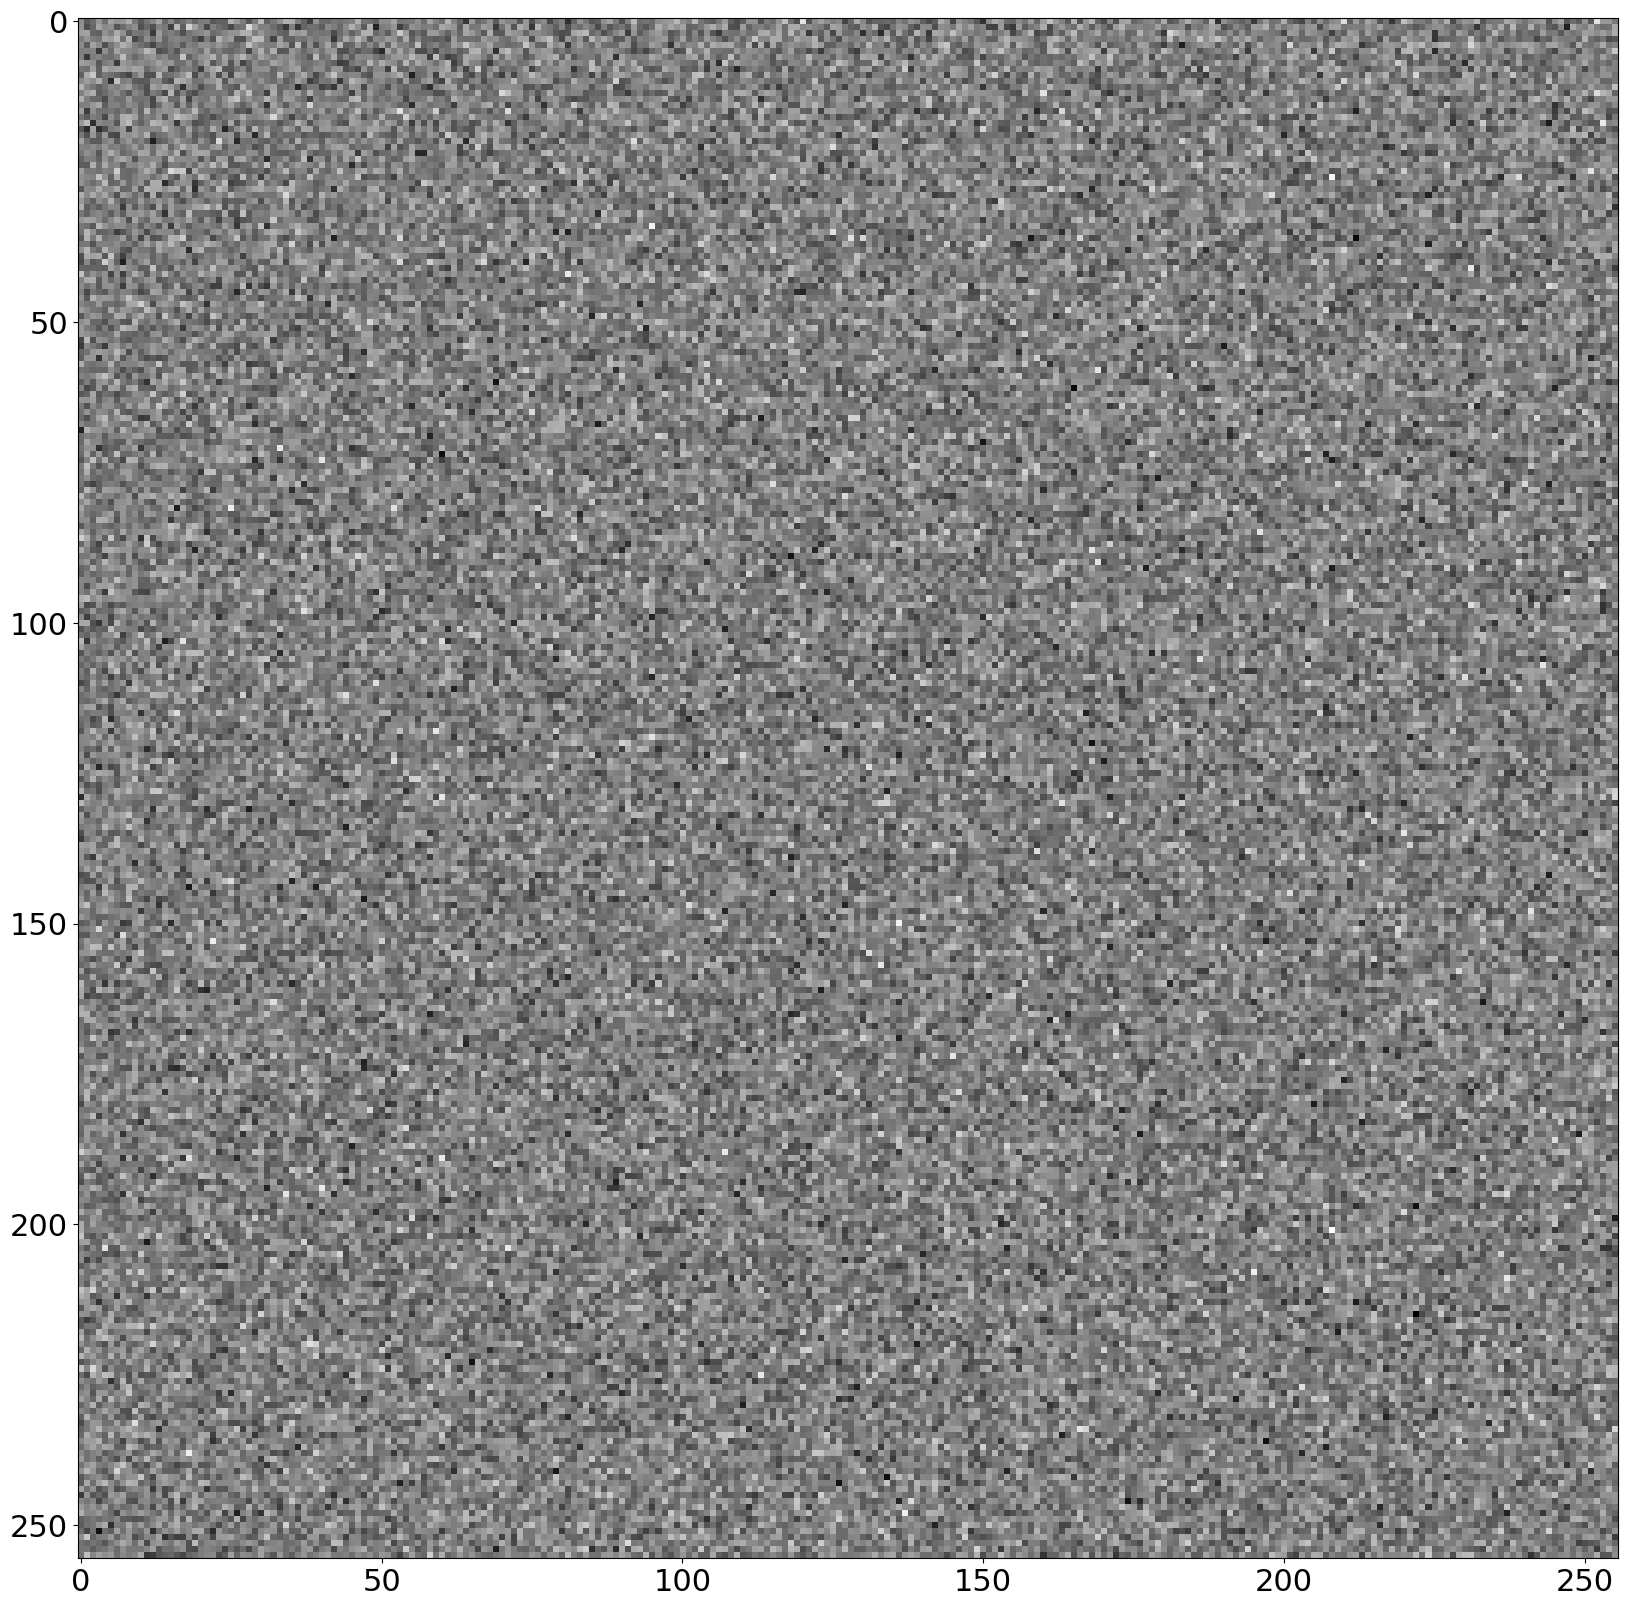

In [ ]:
plt.imshow(idctImage(np.round(dy))-y,cmap='gray')

### JPEG quality factor

In [ ]:
q=np.reshape(np.array([16,11,10,16,	24,	40,	51,	61,
12,	12,	14,	19,	26,	58,	60,	55,
14,	13,	16,	24,	40,	57,	69,	56,
14,	17,	22,	29,	51,	87,	80,	62,
18,	22,	37,	56,	68,	109,	103,	77,
24,	35,	55,	64,	81,	104,	113,	92,
49,	64,	78,	87,	103,	121,	120,	101,
72,	92,	95,	98,	112,	100,	103,	99]),(8,8))

In [ ]:
dyc=compressImage(y,q)

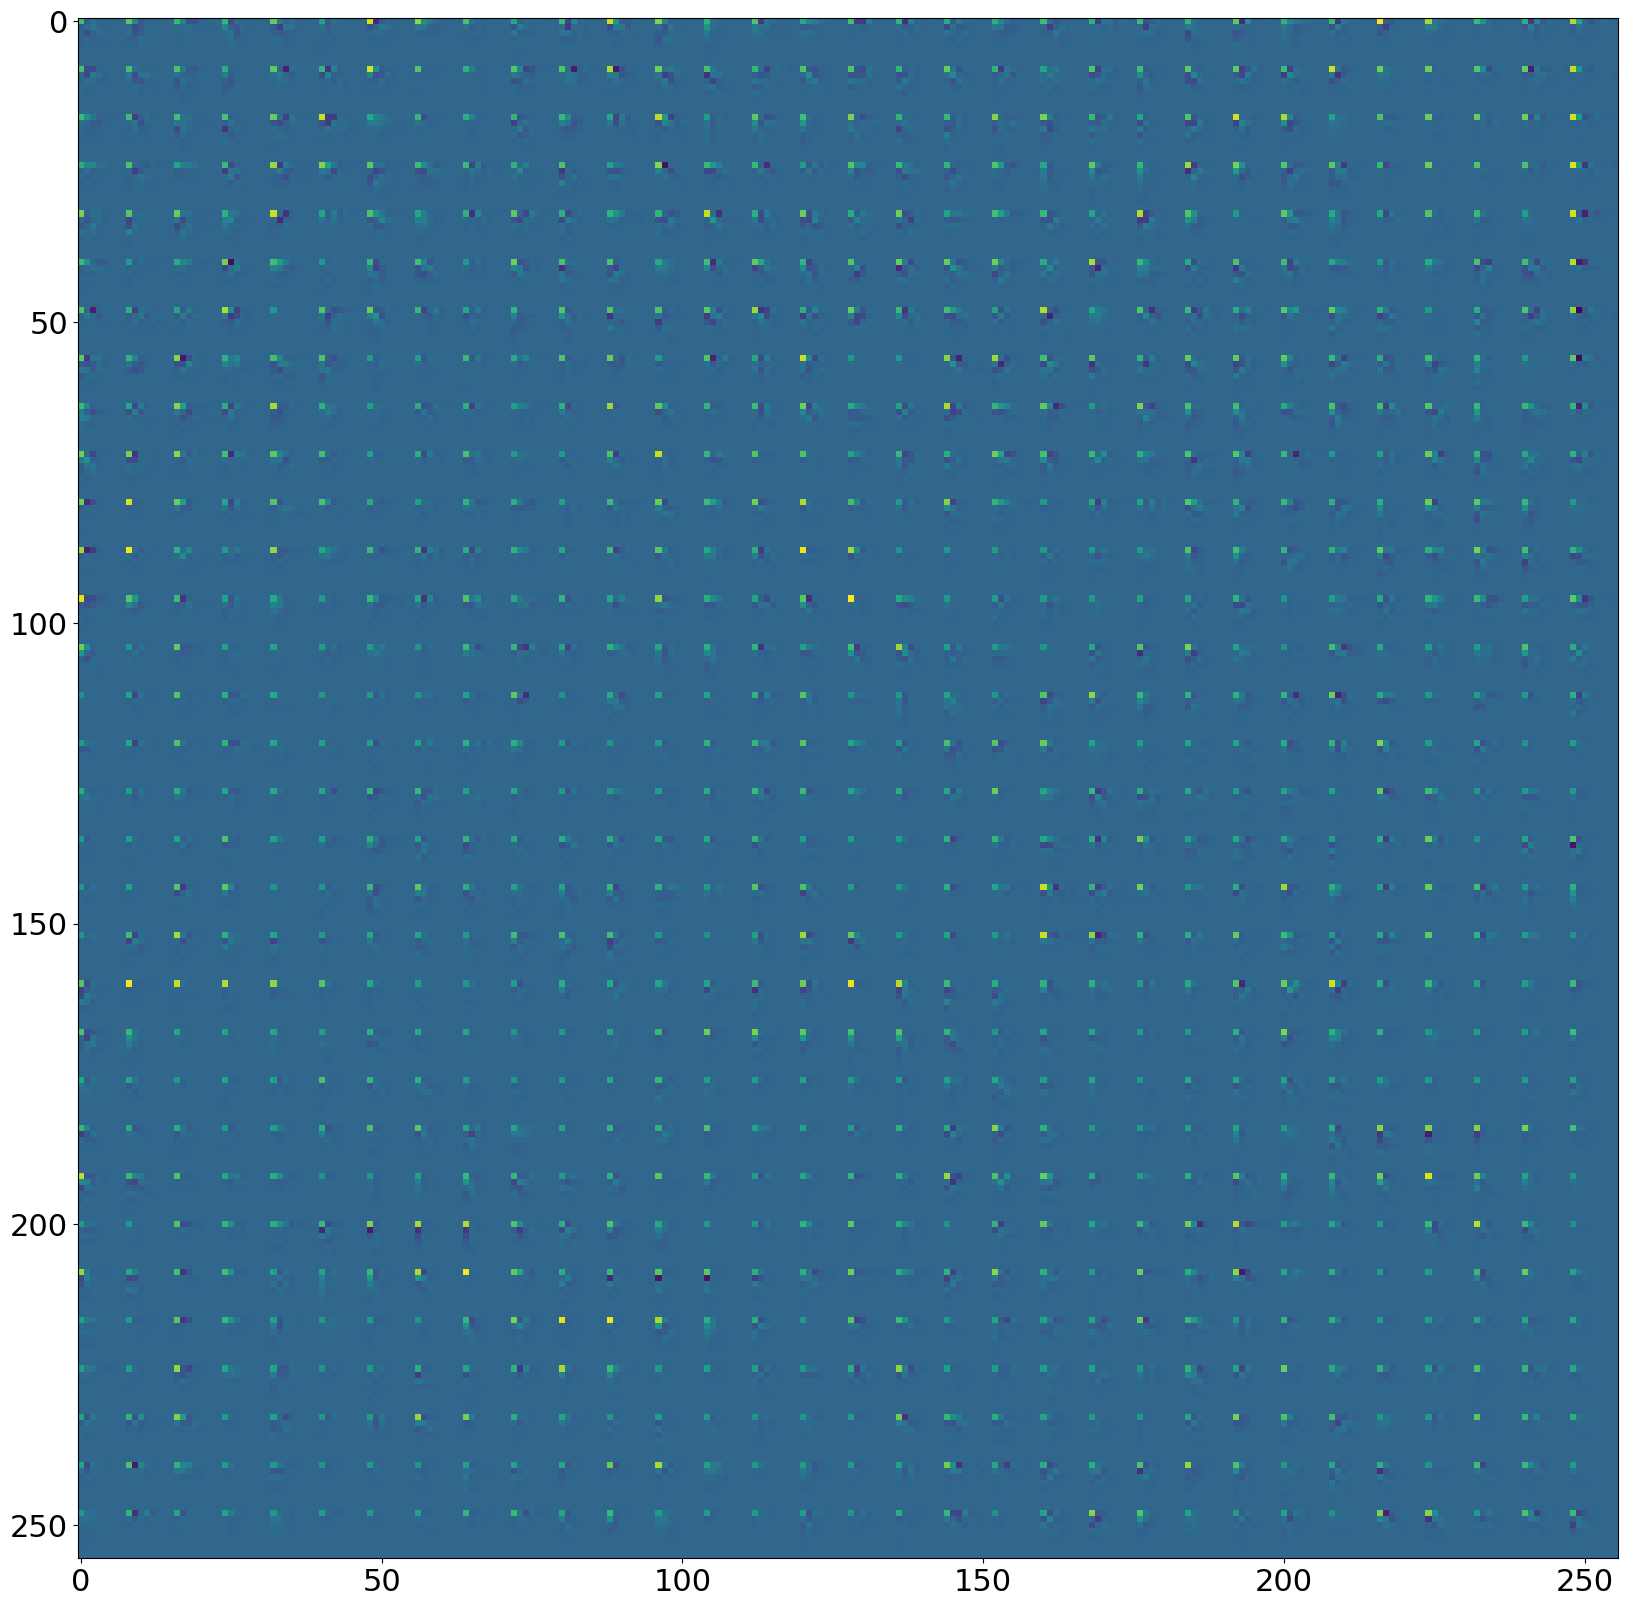

In [ ]:
plt.imshow(dyc)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

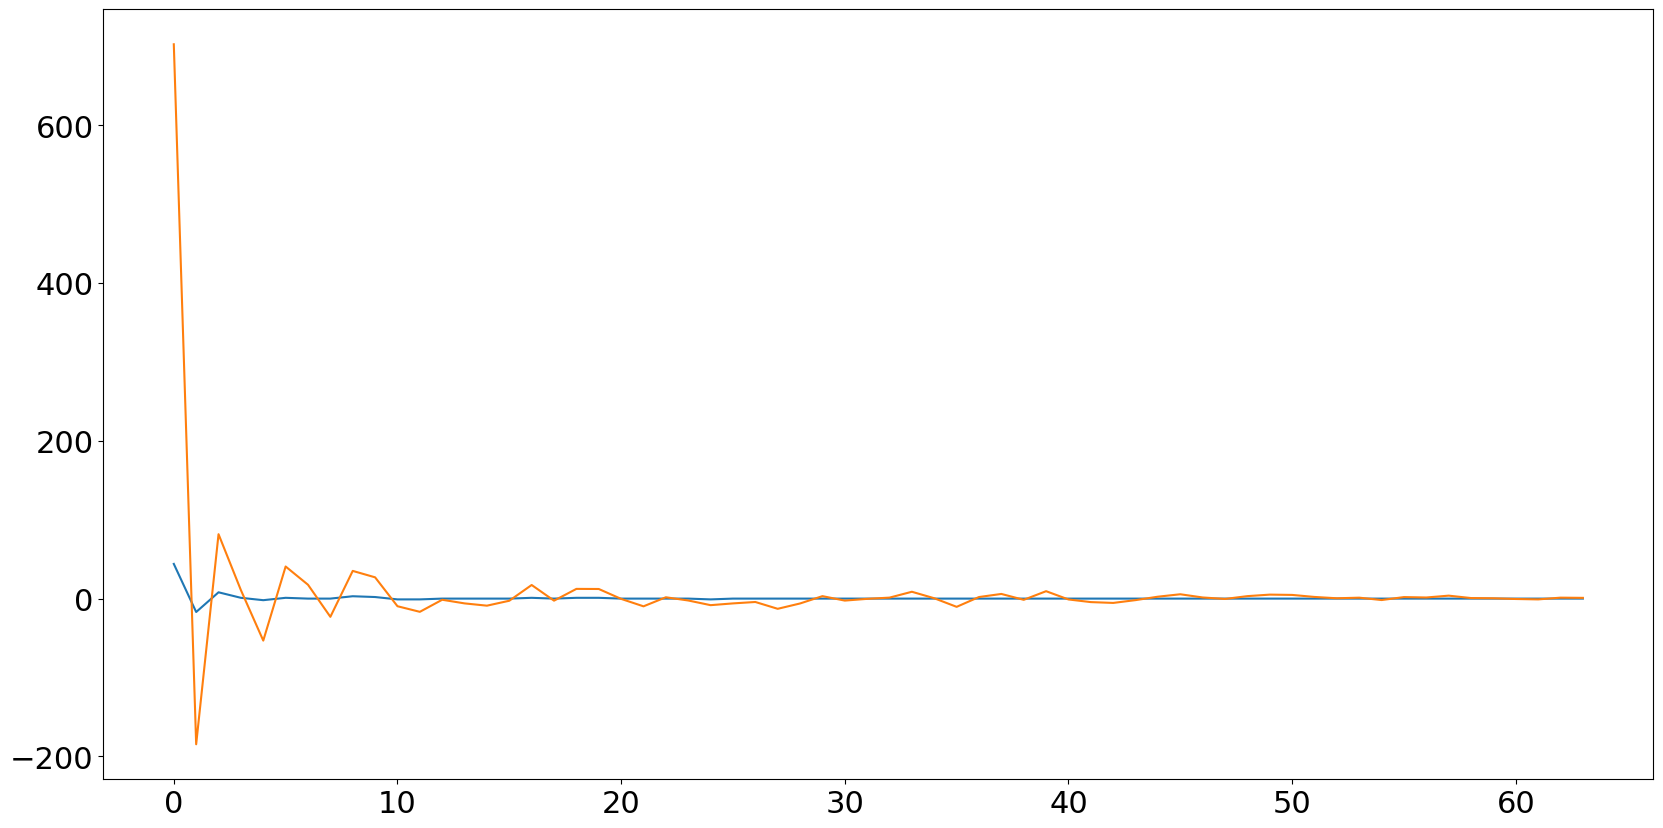

In [ ]:
i=64
j=64
plt.figure(figsize=(20,10))
plt.plot(np.r_[0:64],np.ndarray.flatten(dyc[i:(i+8),j:(j+8)],'K'),np.r_[0:64],np.ndarray.flatten(dy[i:(i+8),j:(j+8)] ))
plt.savefig('blockValues.pdf',bbox_inches='tight')
files.download('blockValues.pdf')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

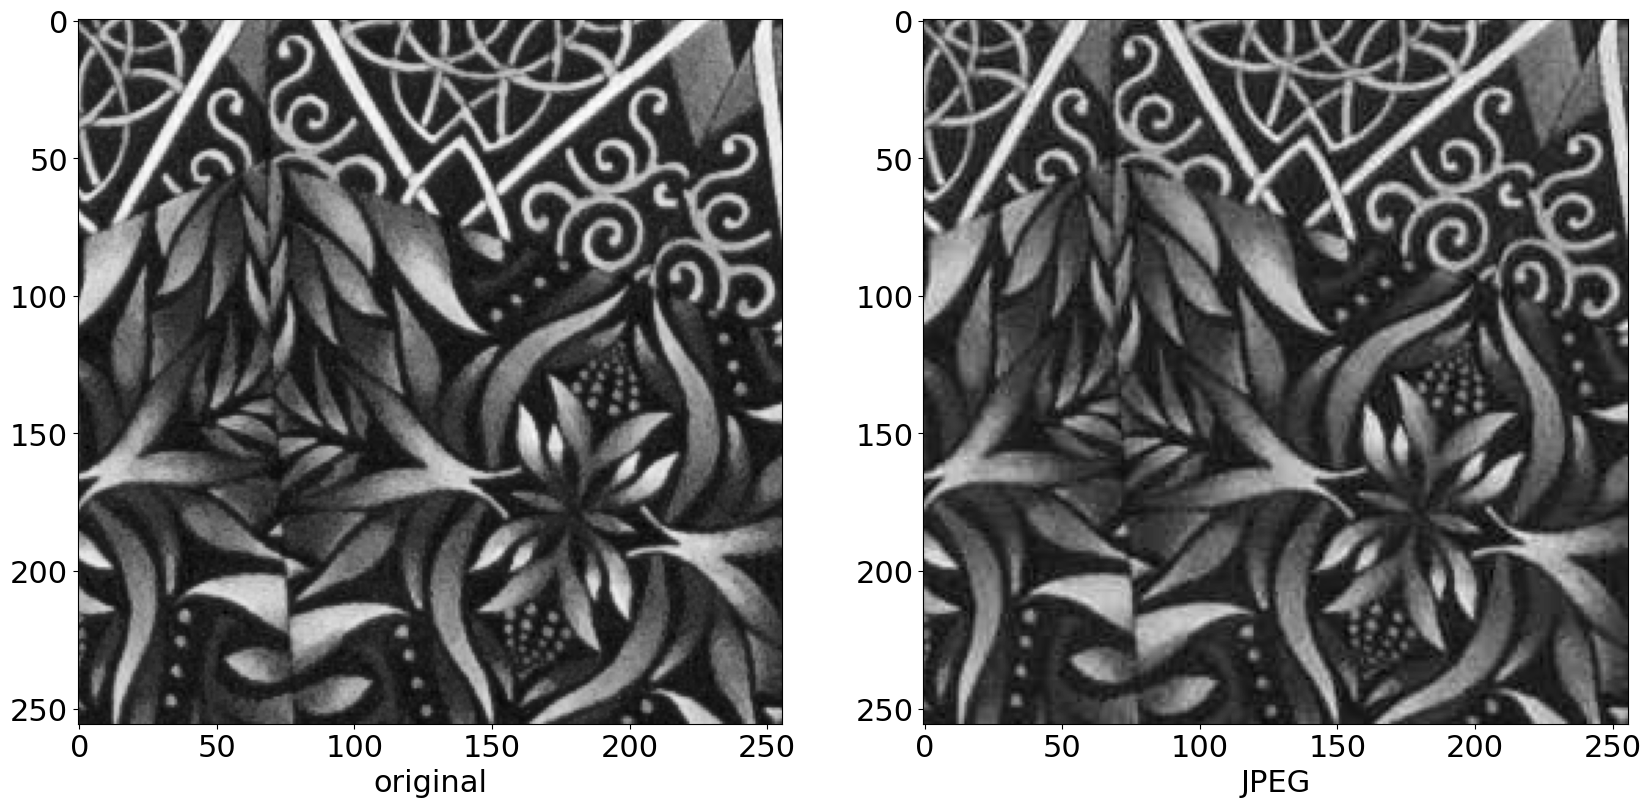

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(y,cmap='gray')
plt.xlabel('original')
plt.subplot(1,2,2)
plt.imshow(deCompressImage(dyc,q),cmap='gray')
plt.xlabel('JPEG')
plt.savefig('JPEGCompressed.pdf',bbox_inches='tight')
files.download('JPEGCompressed.pdf')

In [ ]:
np.min(dyc)

-46.0

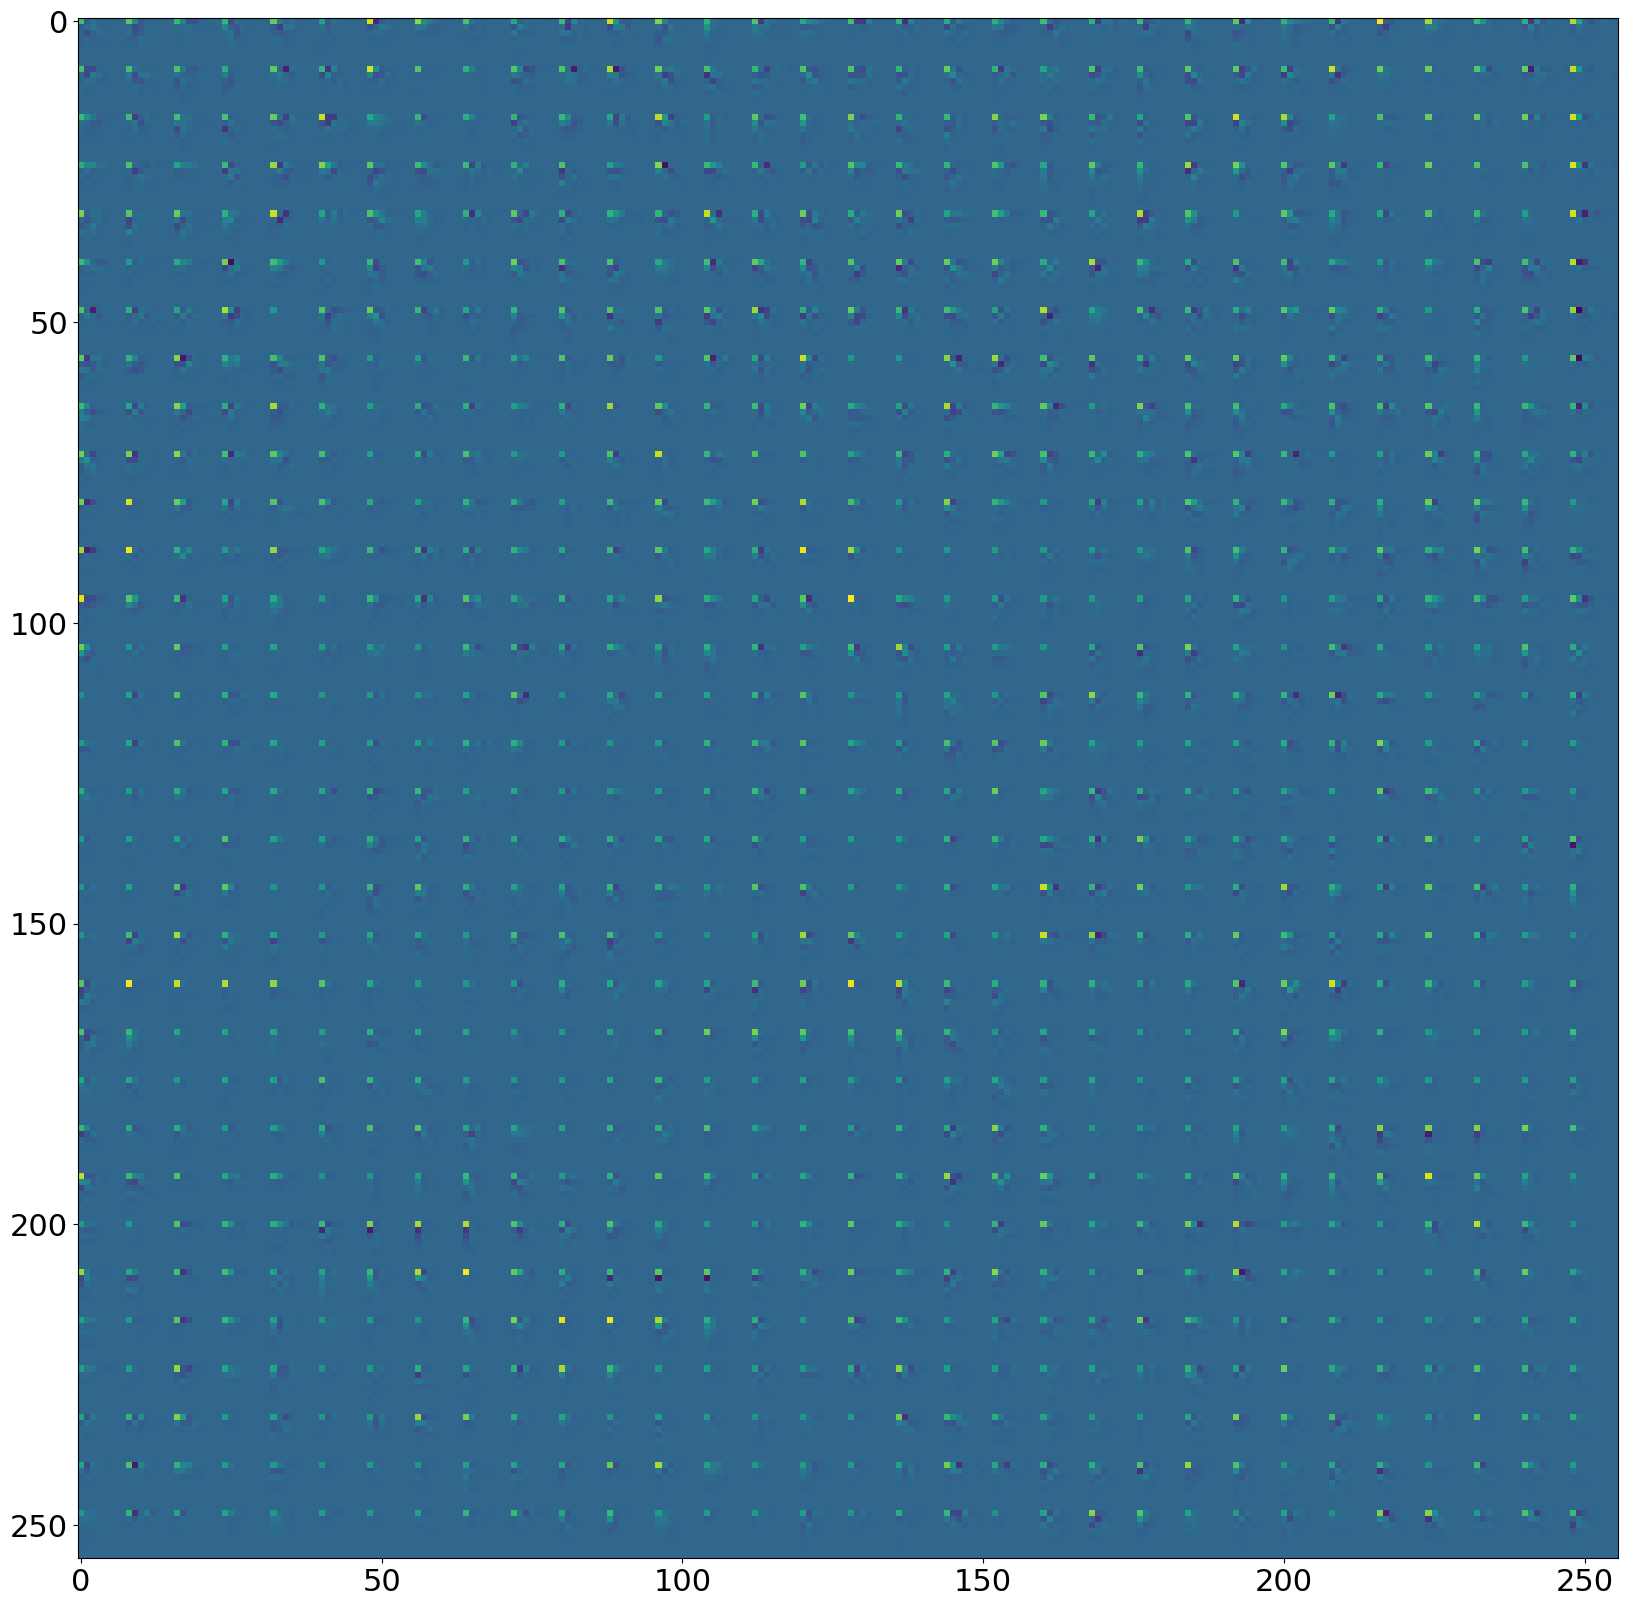

In [ ]:
plt.imshow(dyc)

In [ ]:
dyc=compressImage(y,np.round(q/16))

In [ ]:
dyc=compressImage(y,10*np.ones((8,8)))

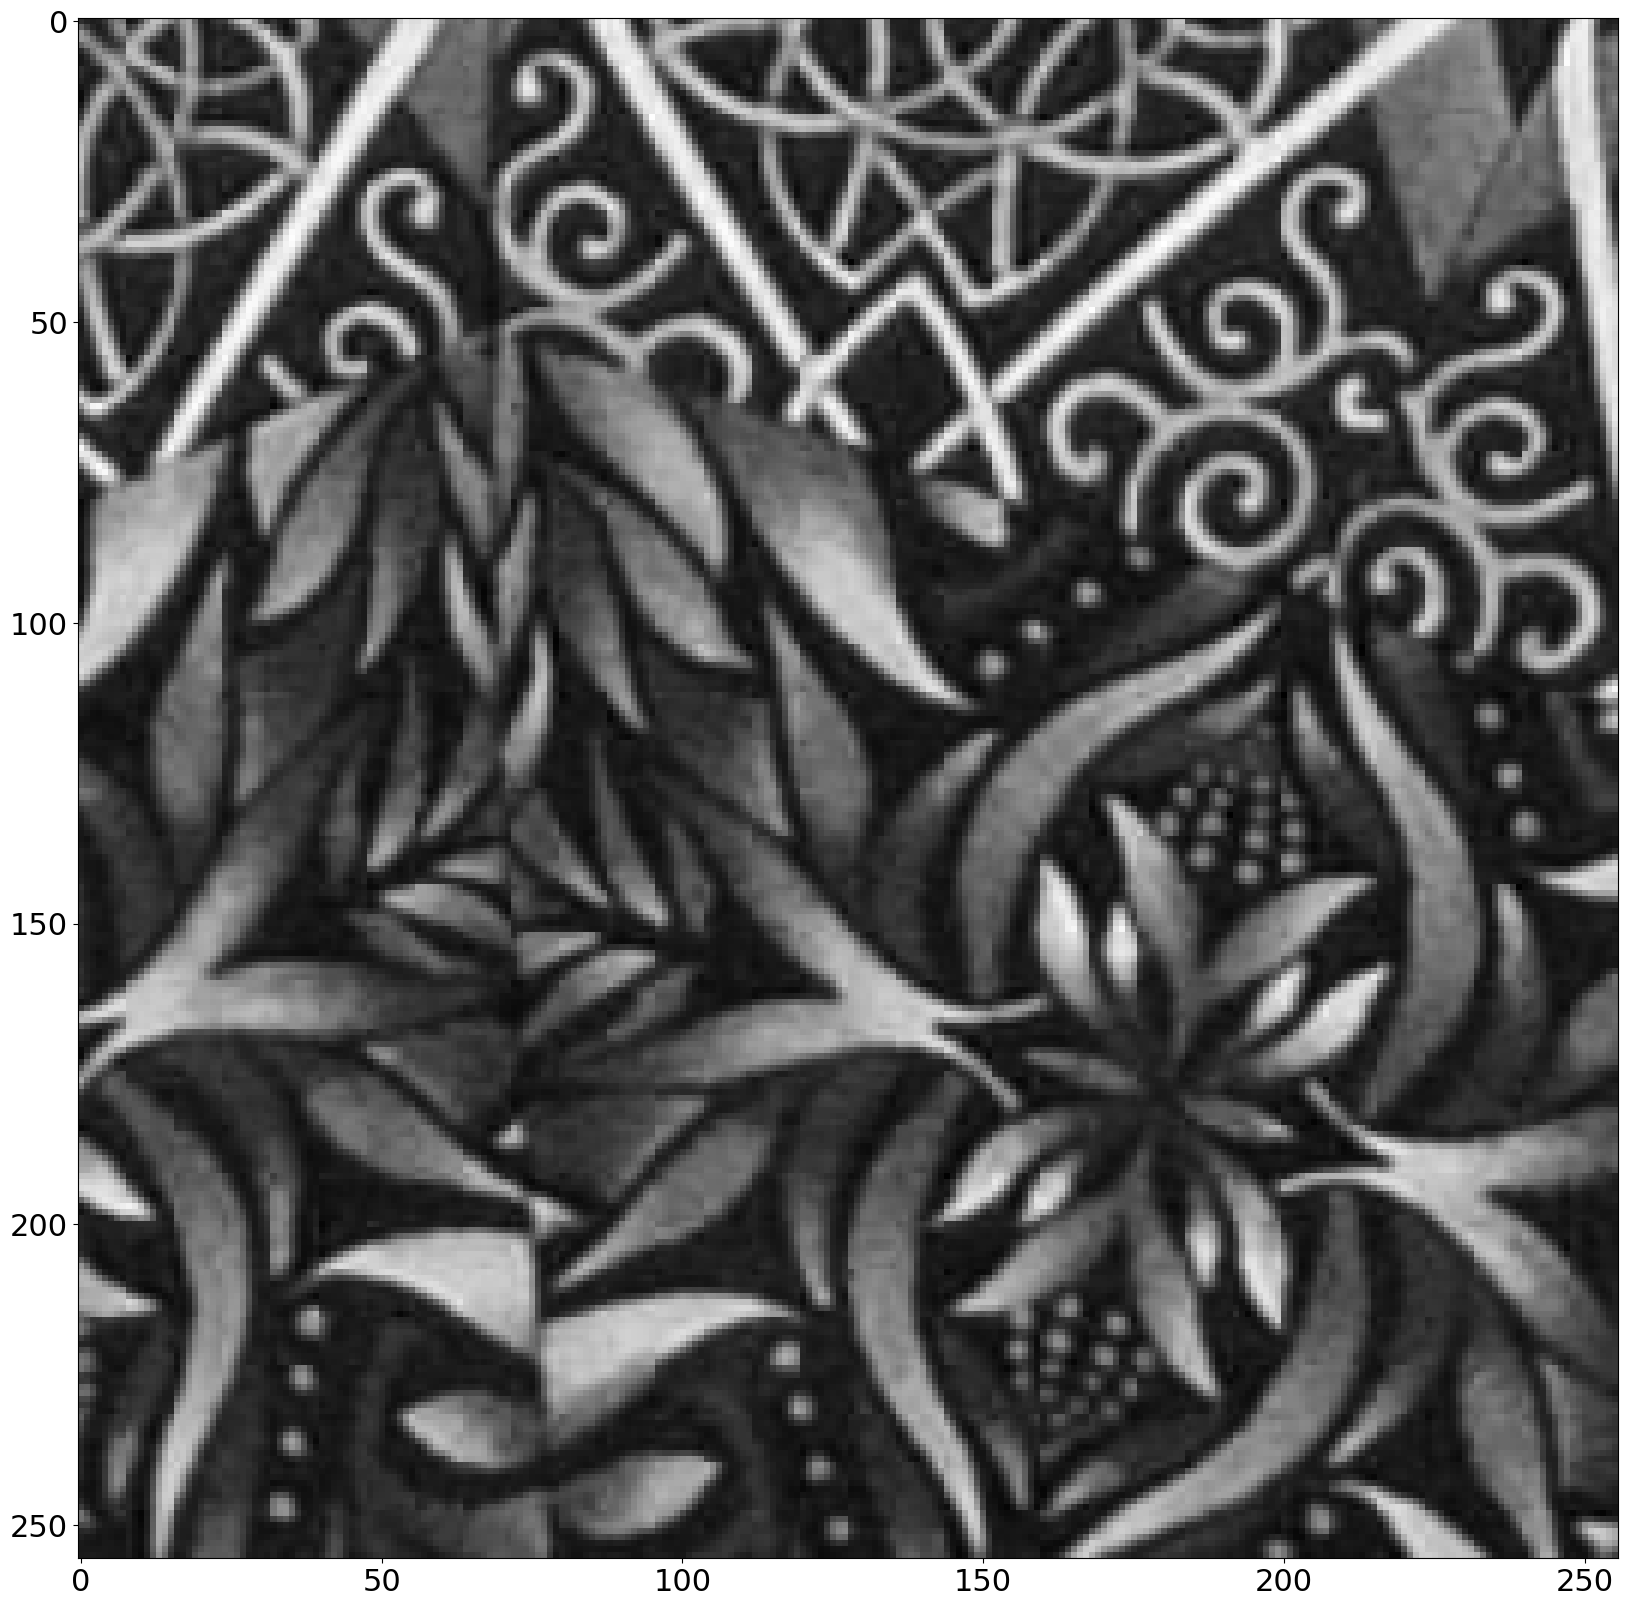

In [ ]:
plt.imshow(idctImage(dyc),cmap='gray')